Objective:-Apply EDA to analyse the patterns present in the data and ensure that the applicants capable of repaying the loan are not rejected.

import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import seaborn as sns

import files

In [3]:
inp0=pd.read_csv('application_data.csv')
inp1=pd.read_csv('previous_application.csv')

In [4]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

DAYS_BIRTH: Client's age in days at the time of application
DAYS_EMPLOYED: How many days before the application the person started current employment
DAYS_REGISTRATION: How many days before the application did client change his registration
DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan


Age and days cannot be negative so made them positive

In [5]:
inp0['DAYS_BIRTH']=inp0.DAYS_BIRTH.apply(lambda x:x*(-1) if x<0 else x)
inp0['DAYS_EMPLOYED']=inp0.DAYS_EMPLOYED.apply(lambda x:x*(-1) if x<0 else x)
inp0['DAYS_REGISTRATION']=inp0.DAYS_REGISTRATION.apply(lambda x:x*(-1) if x<0 else x)
inp0['DAYS_ID_PUBLISH']=inp0.DAYS_ID_PUBLISH.apply(lambda x:x*(-1) if x<0 else x)
inp0['DAYS_LAST_PHONE_CHANGE']=inp0.DAYS_LAST_PHONE_CHANGE.apply(lambda x:x*(-1) if x<0 else x)


In [6]:
inp0.iloc[:,0:22]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           24700.5  ...               Working  Secondary / secondary special   
1           35698.5  ...         State servant               Higher education   
2            6750.0  ...               Working  Secondary / secondary special   
3           29686.5  ...               Working  Secondary / secondary special   
4           21865.5  ...               Working  Secondary / secondary special   
...             ...  ...                   ...                            ...   
307506      27558.0  ...               Working  Secondary / secondary special   
307507      12001.5  ...             Pensioner  Secondary / secondary special   
307508      29979.0  ...               Working               Higher education   
307509      20205.0  ...  Commercial associate  Secondary / secondary special   
307510      49117.5  ...  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                   0.018801   
1                    Married  House / apartment                   0.003541   
2       Single / not married  House / apartment                   0.010032   
3             Civil marriage  House / apartment                   0.008019   
4       Single / not married  House / apartment                   0.028663   
...                      ...                ...                        ...   
307506             Separated       With parents                   0.032561   
307507                 Widow  House / apartment                   0.025164   
307508             Separated  House / apartment                   0.005002   
307509               Married  House / apartment                   0.005313   
307510               Married  House / apartment                   0.046220   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            9461            637             3648.0             2120   
1           16765           1188             1186.0              291   
2           19046            225             4260.0             2531   
3           19005           3039             9833.0             2437   
4       

In [7]:
inp0.shape

(307511, 122)

In [8]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 140)

In [9]:
inp0.isna().sum()*100/307511

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
# Dropping Columns which have more than 33% null values and unneccesary columns which are not required during Analysis

inp0.drop(inp0.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns, axis = 1, inplace = True)
inp0.drop(inp0.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns, axis = 1, inplace = True)

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [11]:
inp0.isna().sum()*100/307511

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [12]:
inp0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean         4986.120328      2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min             0.000000         0.000000       0.000000       0.000000   
25%          2010.000000      1720.000000       5.000000       1.000000   
50%          4504.000000      3254.000000       9.000000       1.000000   
75%          7479.500000      4299.000000      15.000000       1.000000   
max         24672.000000      7197.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

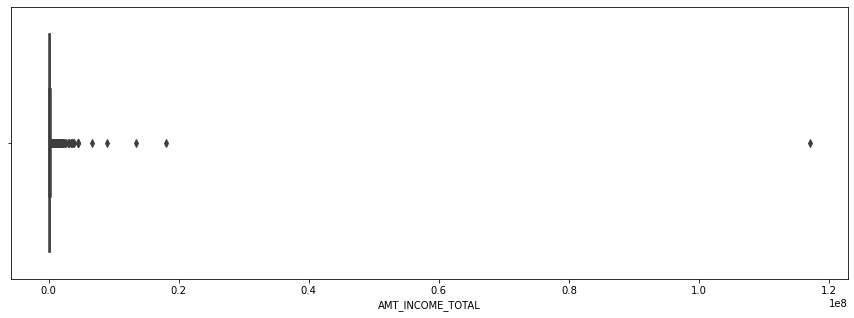

In [13]:
plt.figure(figsize=[15,5])
sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.show()

In [14]:
# In AMT_INCOME_TOTAL value 117000000 is too high and loan requested is too low we can drop this row as this value effect mean and other calculations

inp0 = inp0[~(inp0['AMT_INCOME_TOTAL']==117000000)]
inp0.shape


(307510, 55)

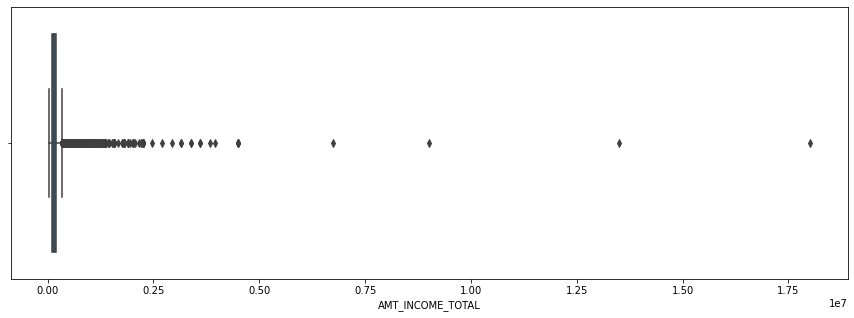

In [15]:
plt.figure(figsize=[15,5])
sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.show()

In [16]:
inp0.AMT_CREDIT.describe()

count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

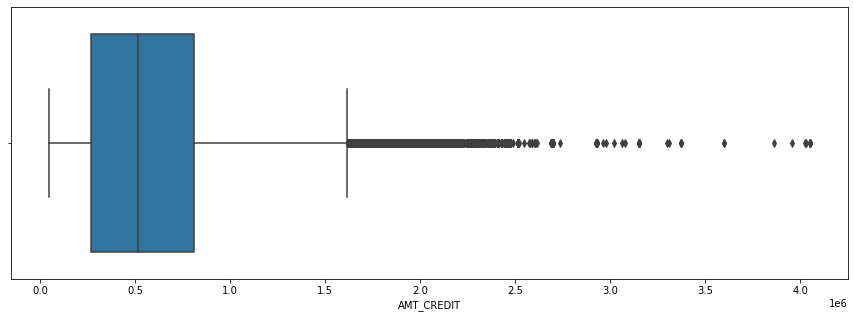

In [17]:
plt.figure(figsize=[15,5])
sns.boxplot(inp0.AMT_CREDIT)
plt.show()
# Credit amount depends on how much amount applicant required, no need to remove any row

In [18]:
inp0.AMT_ANNUITY.describe()

count    307498.000000
mean      27108.576882
std       14493.760789
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

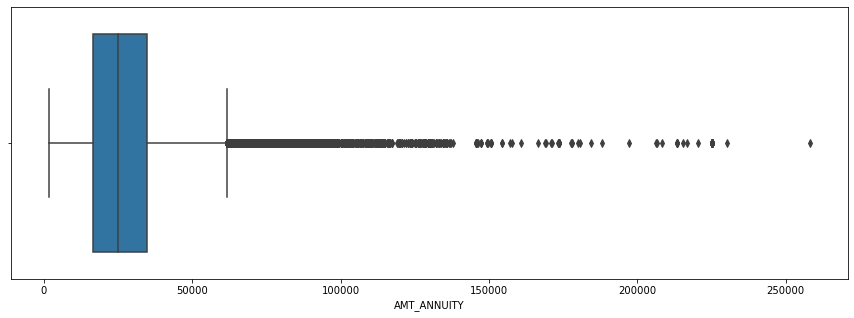

In [19]:
plt.figure(figsize=[15,5])
sns.boxplot(inp0.AMT_ANNUITY)
plt.show() 

# Amount annuity depends on credit value, no need to remove any row

In [20]:
inp0.AMT_GOODS_PRICE.describe()

count    3.072320e+05
mean     5.383965e+05
std      3.694470e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

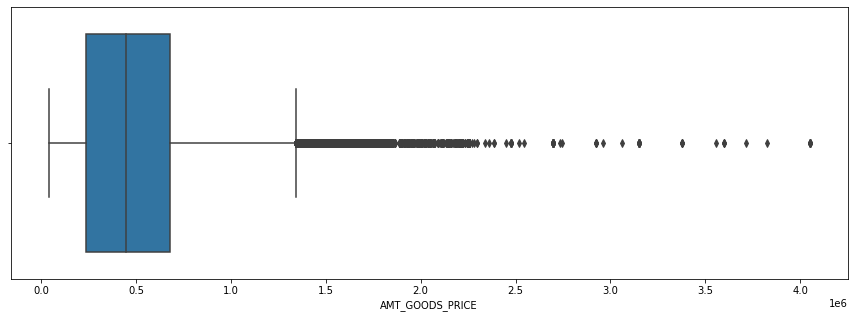

In [21]:
plt.figure(figsize=[15,5])
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()


In [22]:
# AMT_INCOME_TOTAL must be greater than AMT_ANNUITY if it's not how person can pay annuity amount every month

inp0 = inp0[~(inp0['AMT_INCOME_TOTAL']<inp0['AMT_ANNUITY'])]
inp0.shape


(307477, 55)

In [23]:
# Convert DAYS_BIRTH and DAYS_EMPLOYED in years adding new columns Applicant_age and Applicant_experience
inp0['Applicant_age']=round(inp0['DAYS_BIRTH']/365,2)
inp0['Applicant_experience']=round(inp0['DAYS_EMPLOYED']/365,2)


In [24]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [25]:
inp0['Applicant_age'].describe()

count    307477.000000
mean         43.936098
std          11.955830
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: Applicant_age, dtype: float64

In [26]:
inp0['Applicant_experience'].describe()

count    307477.000000
mean        185.499921
std         381.999251
min           0.000000
25%           2.560000
50%           6.080000
75%          15.630000
max        1000.670000
Name: Applicant_experience, dtype: float64

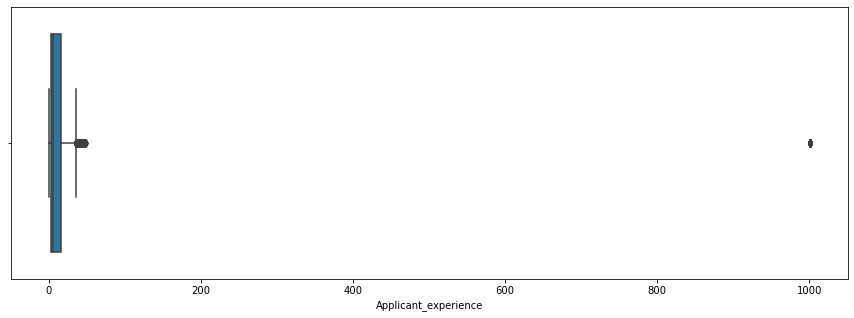

In [27]:
# Age is normal as max age is 69 years but experience have max value 1000 years which is not possible
plt.figure(figsize=[15,5])
sns.boxplot(inp0.Applicant_experience)
plt.show()


In [28]:
inp0[inp0['Applicant_experience']>inp0['Applicant_age']]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307469      456209       0         Cash loans           F            N   
307483      456227       0         Cash loans           F            N   
307487      456231       0         Cash loans           M            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
38                   Y             0         99000.000    247275.0   
43                   Y             0        108000.000    746280.0   
...                ...           ...               ...         ...   
307469               Y             0        202500.000    703728.0   
307483               Y             0         99000.000    247275.0   
307487               Y             0        117000.000   1071909.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children        Pensioner   
11          10678.5         135000.0        Children        Pensioner   
23          23850.0         225000.0   Unaccompanied        Pensioner   
38          17338.5         225000.0   Unaccompanied        Pensioner   
43          42970.5         675000.0   Unaccompanied        Pensioner   
...             ...              ...             ...              ...   
307469      29943.0         607500.0   Unaccompanied        Pensioner   
307483      16479.0         225000.0   Unaccompanied        Pensioner   
307487      31473.0         936000.0   Unaccompanied        Pensioner   
307505      22050.0         225000.0   Unaccompanied        Pensioner   
307507      12001.5         225000.0   Unaccompanied        Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
38      Secondary / secondary special               Married   
43                   Higher education  Single / not married   
...                               ...                   ...   
307469  Secondary / secondary special  Single / not married   
307483  Secondary / secondary special             Separated   
307487  Secondary / secondary special               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634       20099   
11      House / apartment                    0.015221       20417   
23      House / apartment                    0.006296       24827   
38      House / apartment                    0.006207       23920   
43      House / apartment                    0.010966       23548   
...                   ...                         ...         ...   
307469  House / apartment                    0.031329       22414   
307483  House / apartment                    0.007330       24911   
307487  House / apartme

In [29]:
# make value zero for rows having experience value greter than age
inp0['Applicant_experience'].replace({1000.67: 0}, inplace=True)


In [30]:
inp0['Applicant_experience'].describe()

count    307477.000000
mean          5.356084
std           6.320840
min           0.000000
25%           0.790000
50%           3.330000
75%           7.560000
max          49.070000
Name: Applicant_experience, dtype: float64

In [31]:
inp0.TARGET.value_counts()

0    282658
1     24819
Name: TARGET, dtype: int64

In [32]:
inp0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278198
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [33]:
inp0.CODE_GENDER.value_counts()

F      202415
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [34]:
inp0['CODE_GENDER'].replace({'XNA':np.NaN}, inplace=True)


In [35]:
inp0.CODE_GENDER.value_counts()

F    202415
M    105058
Name: CODE_GENDER, dtype: int64

In [36]:
inp0.FLAG_OWN_CAR.value_counts()

N    202901
Y    104576
Name: FLAG_OWN_CAR, dtype: int64

In [37]:
inp0.FLAG_OWN_REALTY.value_counts()

Y    213288
N     94189
Name: FLAG_OWN_REALTY, dtype: int64

In [38]:
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248501
Family              40145
Spouse, partner     11366
Children             3266
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [39]:
inp0.NAME_INCOME_TYPE.value_counts()

Working                 158764
Commercial associate     71615
Pensioner                55341
State servant            21702
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [40]:
inp0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218361
Higher education                  74860
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [41]:
inp0.NAME_FAMILY_STATUS.value_counts()

Married                 196400
Single / not married     45444
Civil marriage           29773
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [42]:
inp0.NAME_HOUSING_TYPE.value_counts()

House / apartment      272835
With parents            14839
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [43]:
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55182
Sales staff              32102
Core staff               27568
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9811
Medicine staff            8535
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

## Univariate Analysis

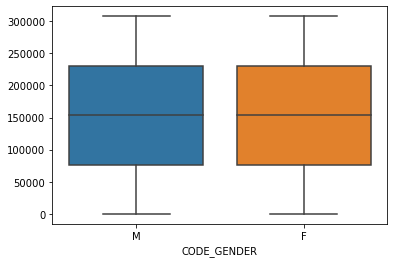

In [44]:
sns.boxplot(inp0.CODE_GENDER, inp0.index)
plt.show()

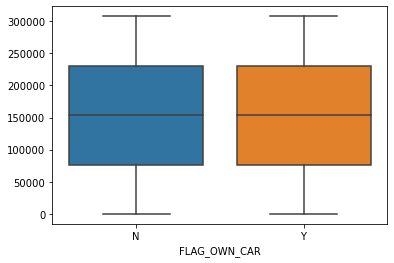

In [45]:
sns.boxplot(inp0.FLAG_OWN_CAR, inp0.index)
plt.show()

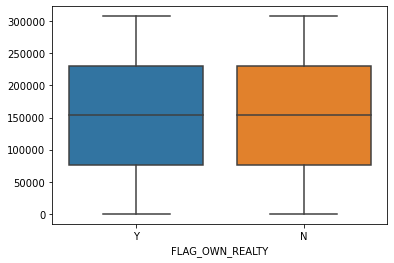

In [46]:
sns.boxplot(inp0.FLAG_OWN_REALTY, inp0.index)
plt.show()

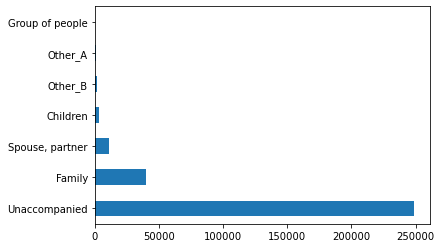

In [47]:
inp0.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.show()

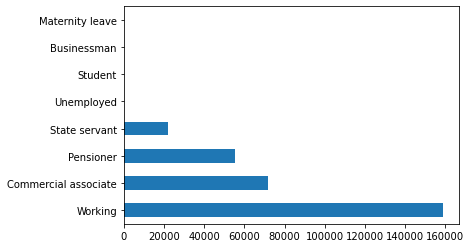

In [48]:
inp0.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.show()

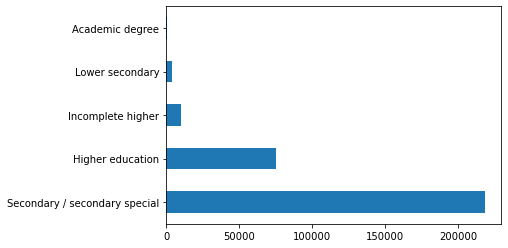

In [49]:
inp0.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.show()

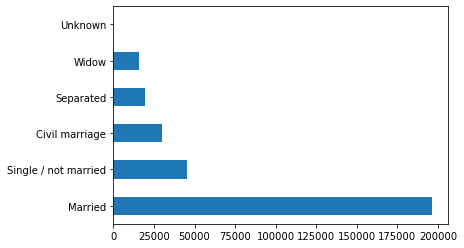

In [50]:
inp0.NAME_FAMILY_STATUS.value_counts().plot.barh()
plt.show()

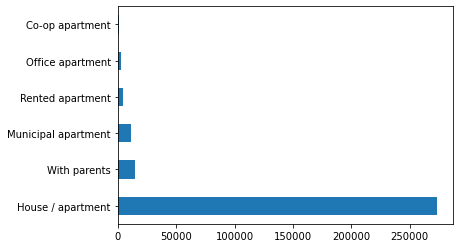

In [51]:
inp0.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.show()

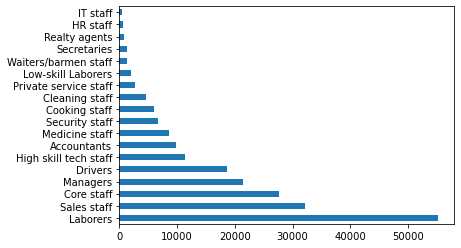

In [52]:
inp0.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

## Segmented Univariate

In [53]:
inp_Tar1=inp0[inp0['TARGET']==1]
inp_Tar0=inp0[inp0['TARGET']==0]

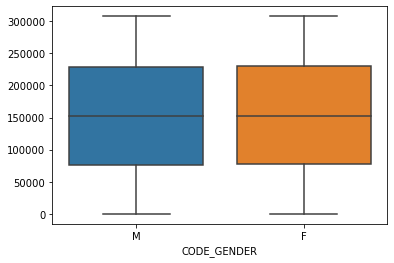

In [54]:
sns.boxplot(inp_Tar1.CODE_GENDER, inp_Tar1.index)
plt.show()

In [55]:
inp_Tar1.CODE_GENDER.value_counts()

F    14164
M    10655
Name: CODE_GENDER, dtype: int64

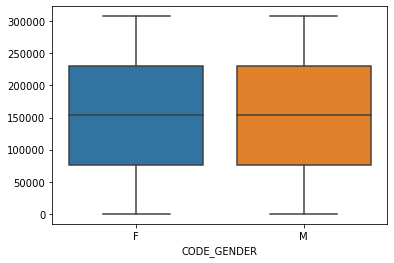

In [56]:
sns.boxplot(inp_Tar0.CODE_GENDER, inp_Tar0.index)
plt.show()

In [57]:
inp_Tar0.CODE_GENDER.value_counts()

F    188251
M     94403
Name: CODE_GENDER, dtype: int64

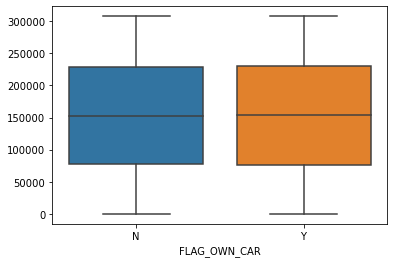

In [58]:
sns.boxplot(inp_Tar1.FLAG_OWN_CAR, inp_Tar1.index)
plt.show()

In [59]:
inp_Tar1.FLAG_OWN_CAR.value_counts()

N    17244
Y     7575
Name: FLAG_OWN_CAR, dtype: int64

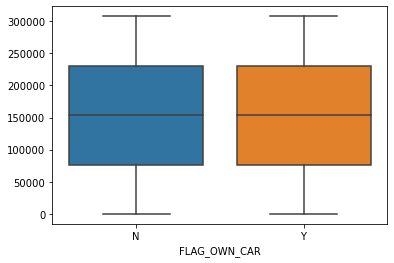

In [60]:
sns.boxplot(inp_Tar0.FLAG_OWN_CAR, inp_Tar0.index)
plt.show()

In [61]:
inp_Tar0.FLAG_OWN_CAR.value_counts()

N    185657
Y     97001
Name: FLAG_OWN_CAR, dtype: int64

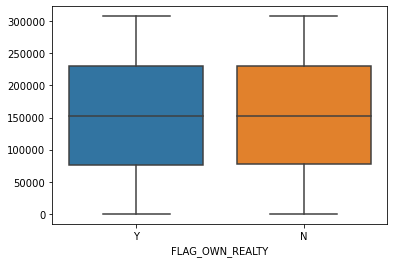

In [62]:
sns.boxplot(inp_Tar1.FLAG_OWN_REALTY, inp_Tar1.index)
plt.show()

In [63]:
inp_Tar1.FLAG_OWN_REALTY.value_counts()

Y    16979
N     7840
Name: FLAG_OWN_REALTY, dtype: int64

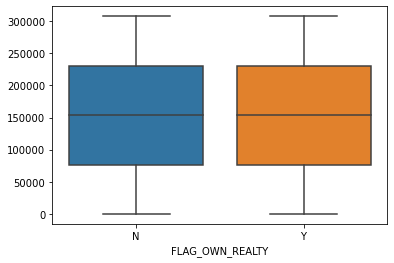

In [64]:
sns.boxplot(inp_Tar0.FLAG_OWN_REALTY, inp_Tar0.index)
plt.show()

In [65]:
inp_Tar0.FLAG_OWN_REALTY.value_counts()

Y    196309
N     86349
Name: FLAG_OWN_REALTY, dtype: int64

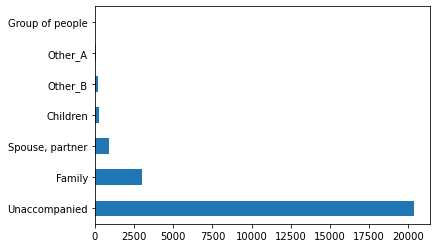

In [66]:
inp_Tar1.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.show()

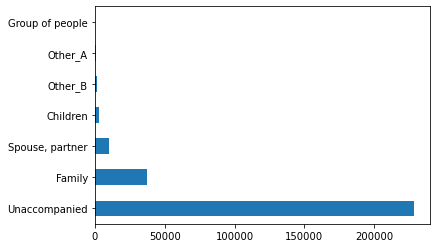

In [67]:
inp_Tar0.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.show()

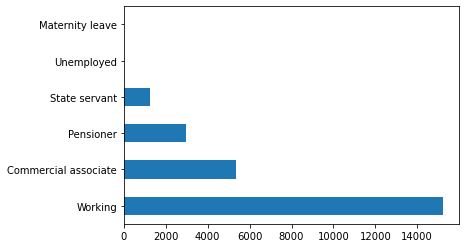

In [68]:
inp_Tar1.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.show()

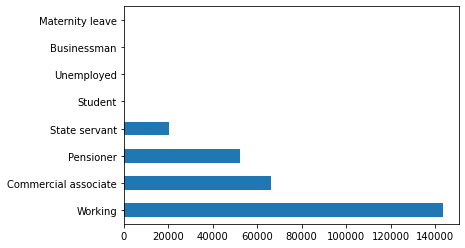

In [69]:
inp_Tar0.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.show()

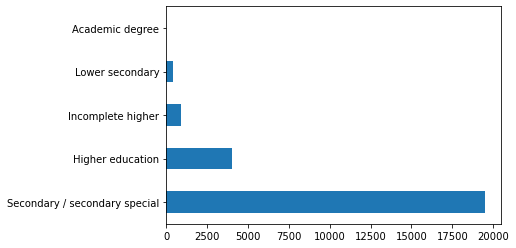

In [70]:
inp_Tar1.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.show()

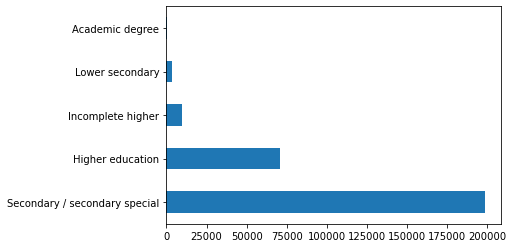

In [71]:
inp_Tar0.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.show()

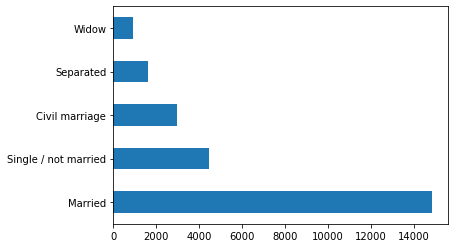

In [72]:
inp_Tar1.NAME_FAMILY_STATUS.value_counts().plot.barh()
plt.show()

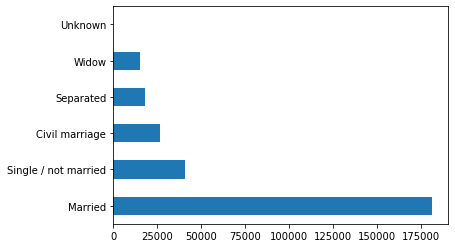

In [73]:
inp_Tar0.NAME_FAMILY_STATUS.value_counts().plot.barh()
plt.show()

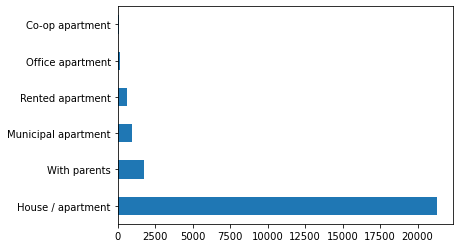

In [74]:
inp_Tar1.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.show()

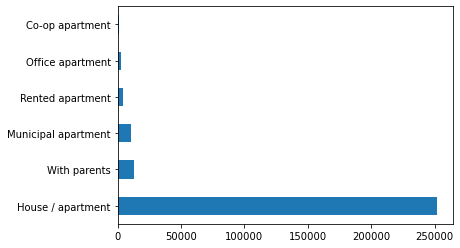

In [75]:
inp_Tar0.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.show()

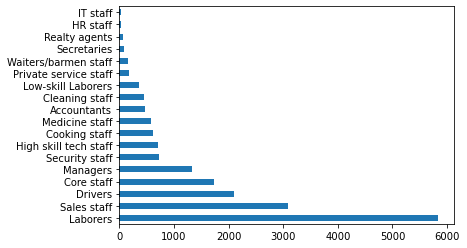

In [76]:
inp_Tar1.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

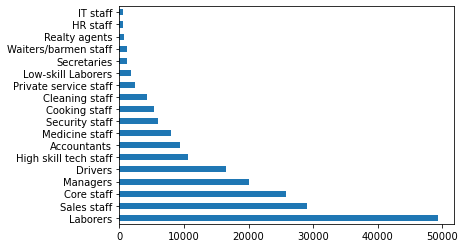

In [77]:
inp_Tar0.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

## Bivariate Analysis

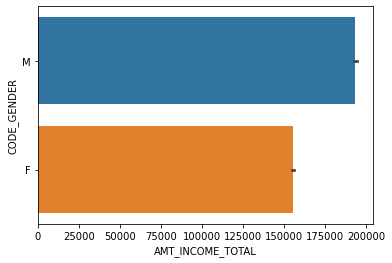

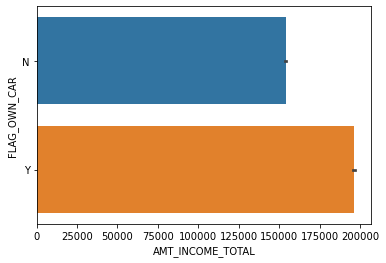

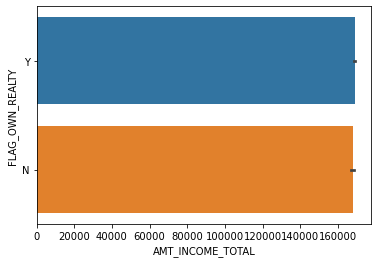

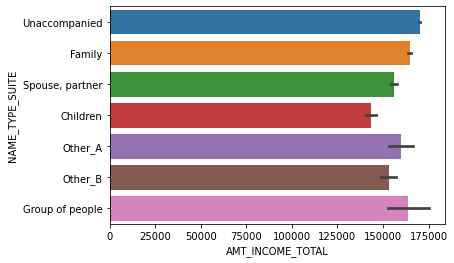

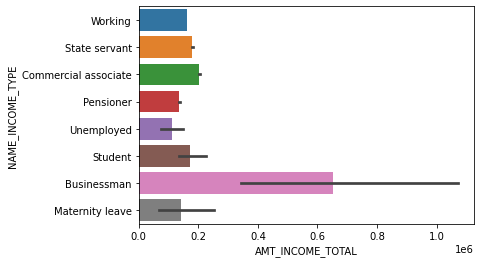

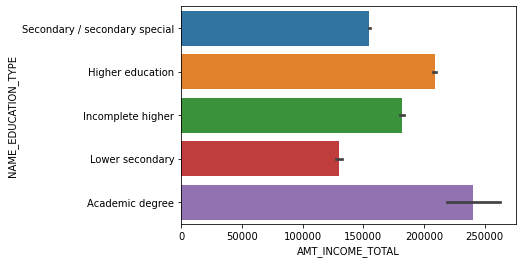

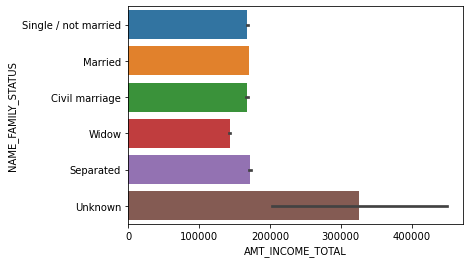

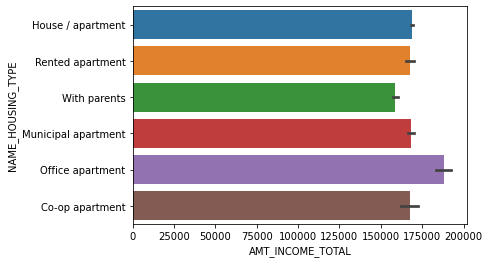

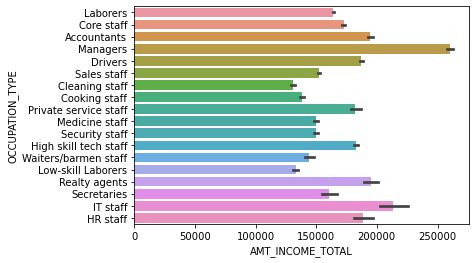

In [78]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp0.AMT_INCOME_TOTAL, inp0[i])
    plt.show()

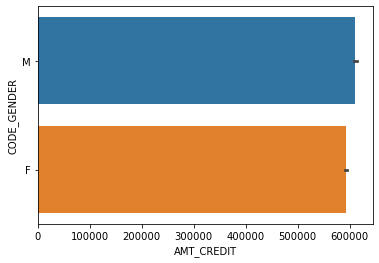

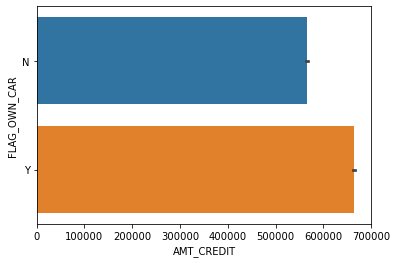

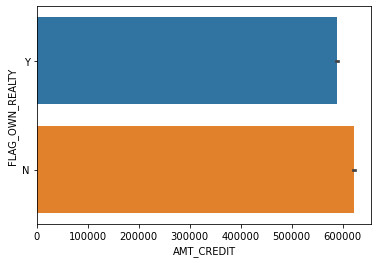

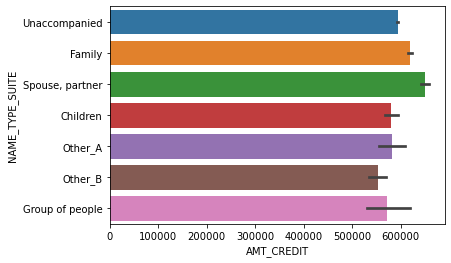

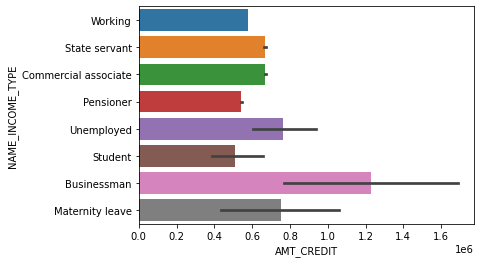

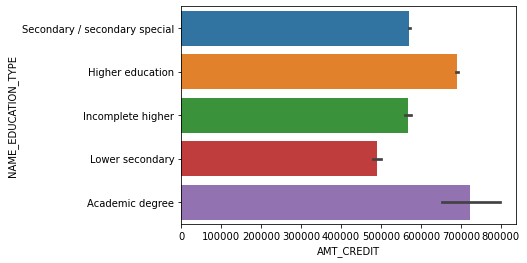

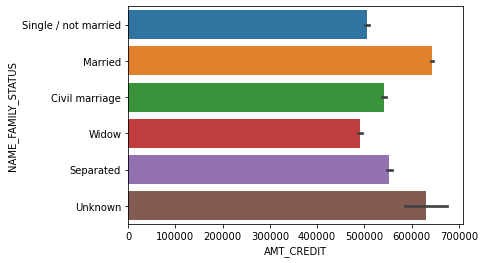

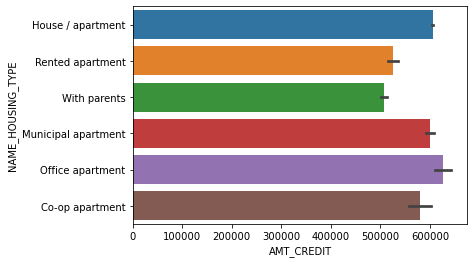

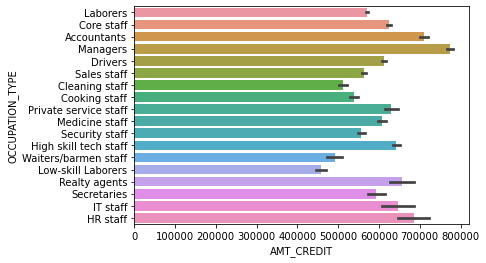

In [79]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp0.AMT_CREDIT, inp0[i])
    plt.show()

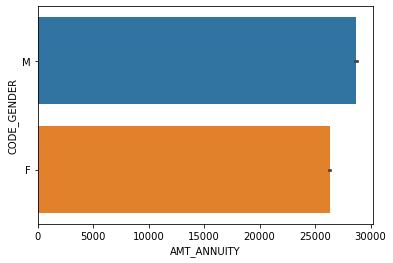

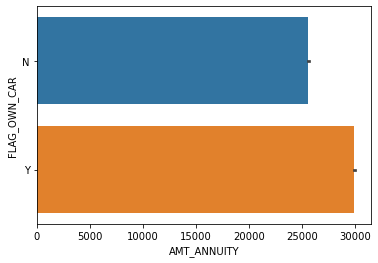

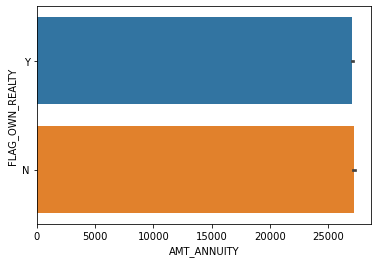

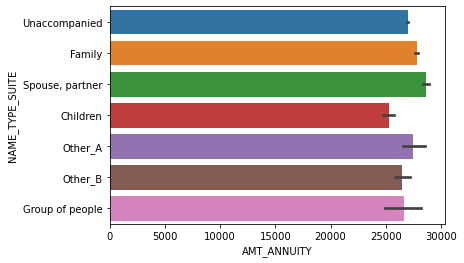

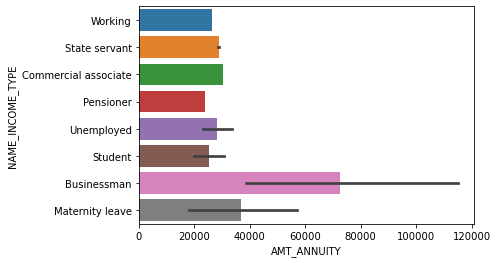

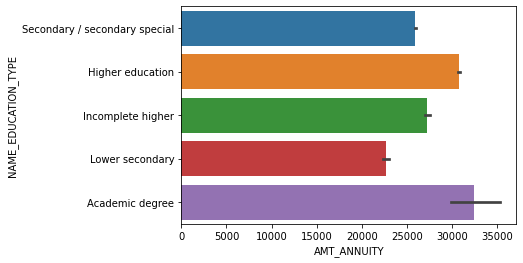

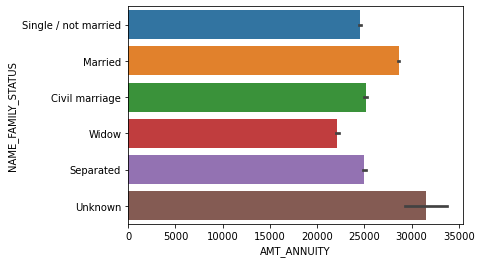

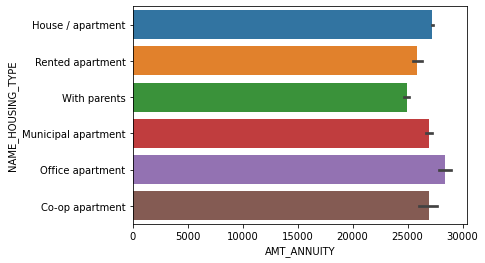

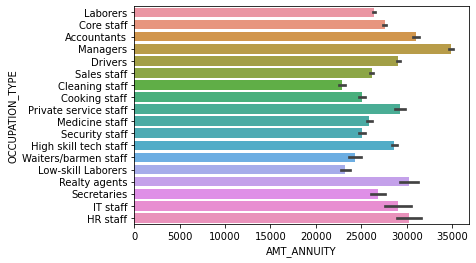

In [80]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp0.AMT_ANNUITY, inp0[i])
    plt.show()

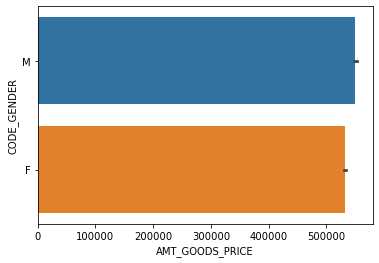

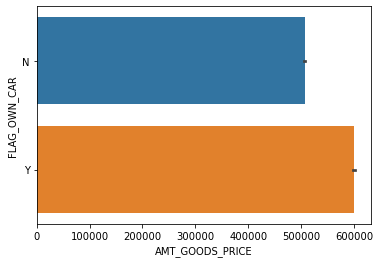

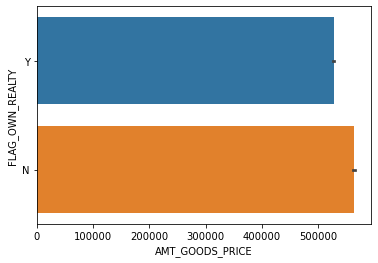

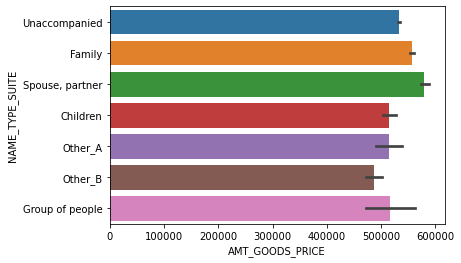

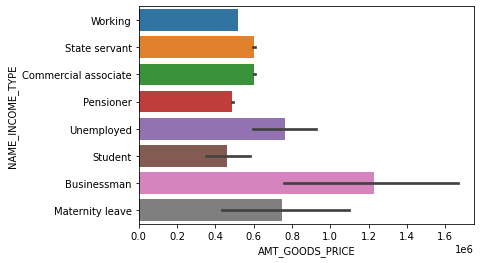

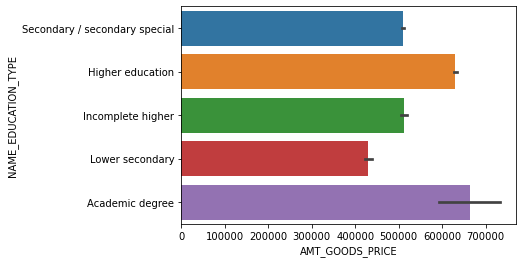

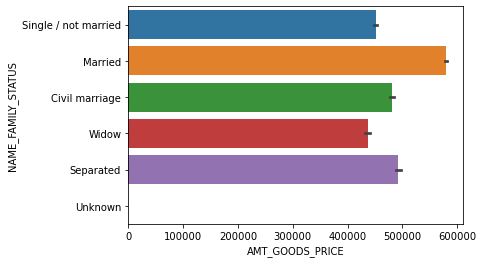

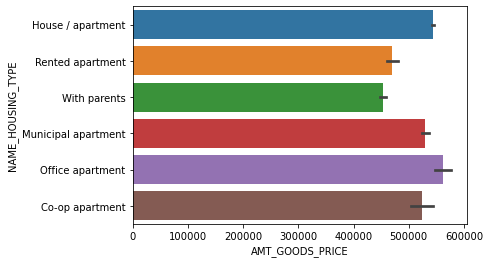

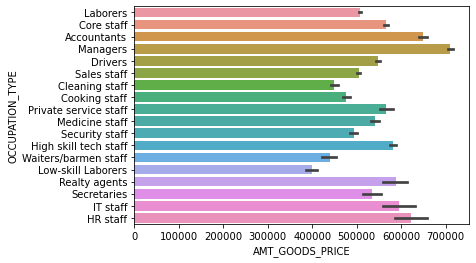

In [81]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp0.AMT_GOODS_PRICE, inp0[i])
    plt.show()

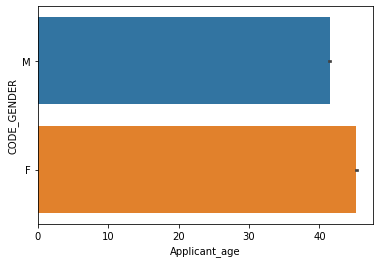

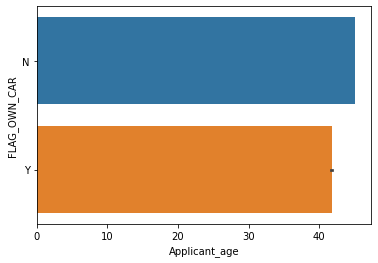

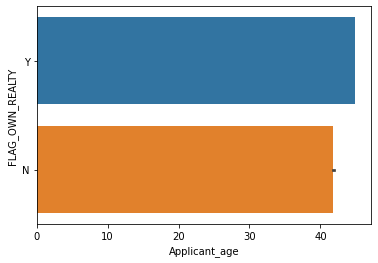

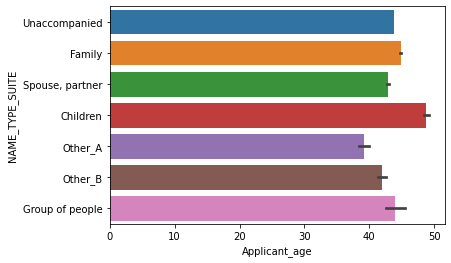

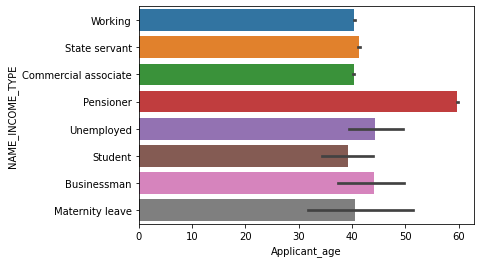

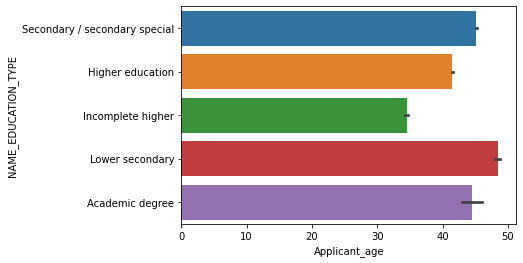

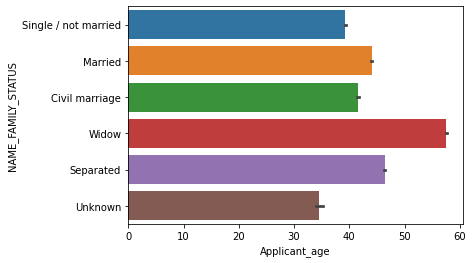

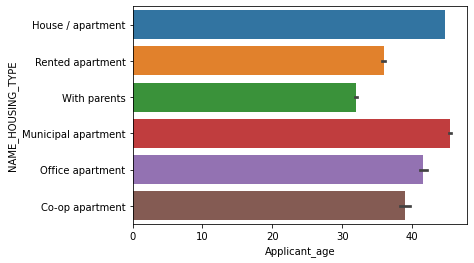

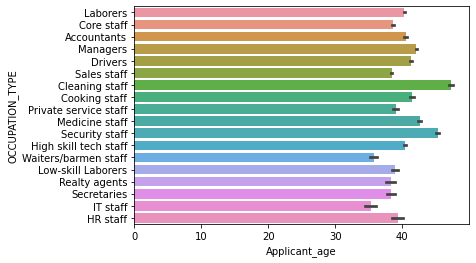

In [82]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp0.Applicant_age, inp0[i])
    plt.show()

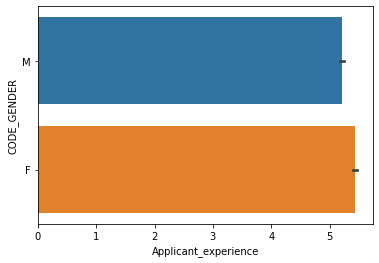

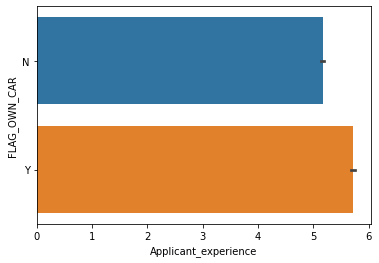

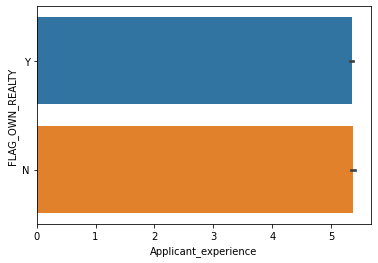

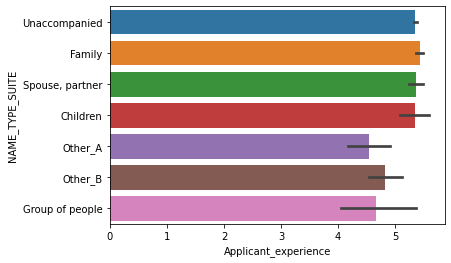

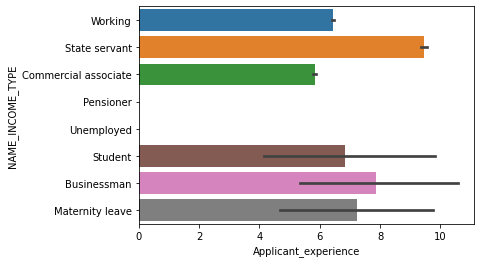

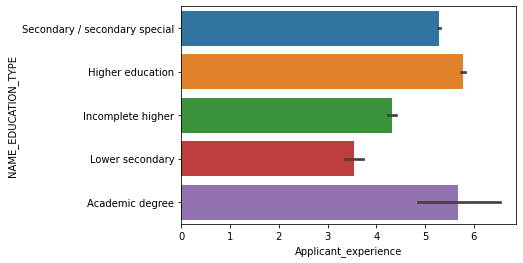

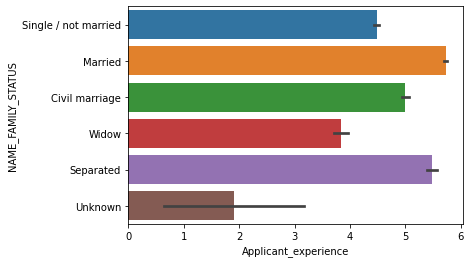

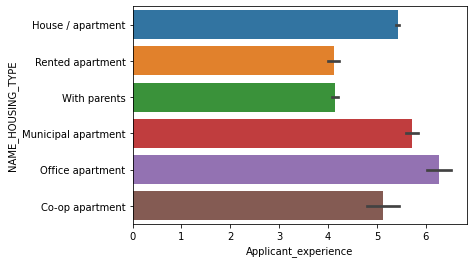

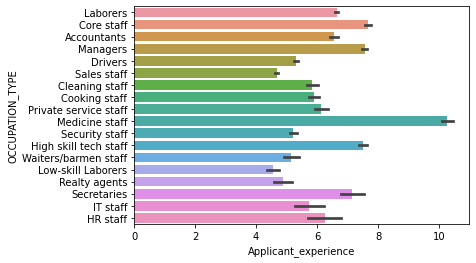

In [83]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp0.Applicant_experience, inp0[i])
    plt.show()

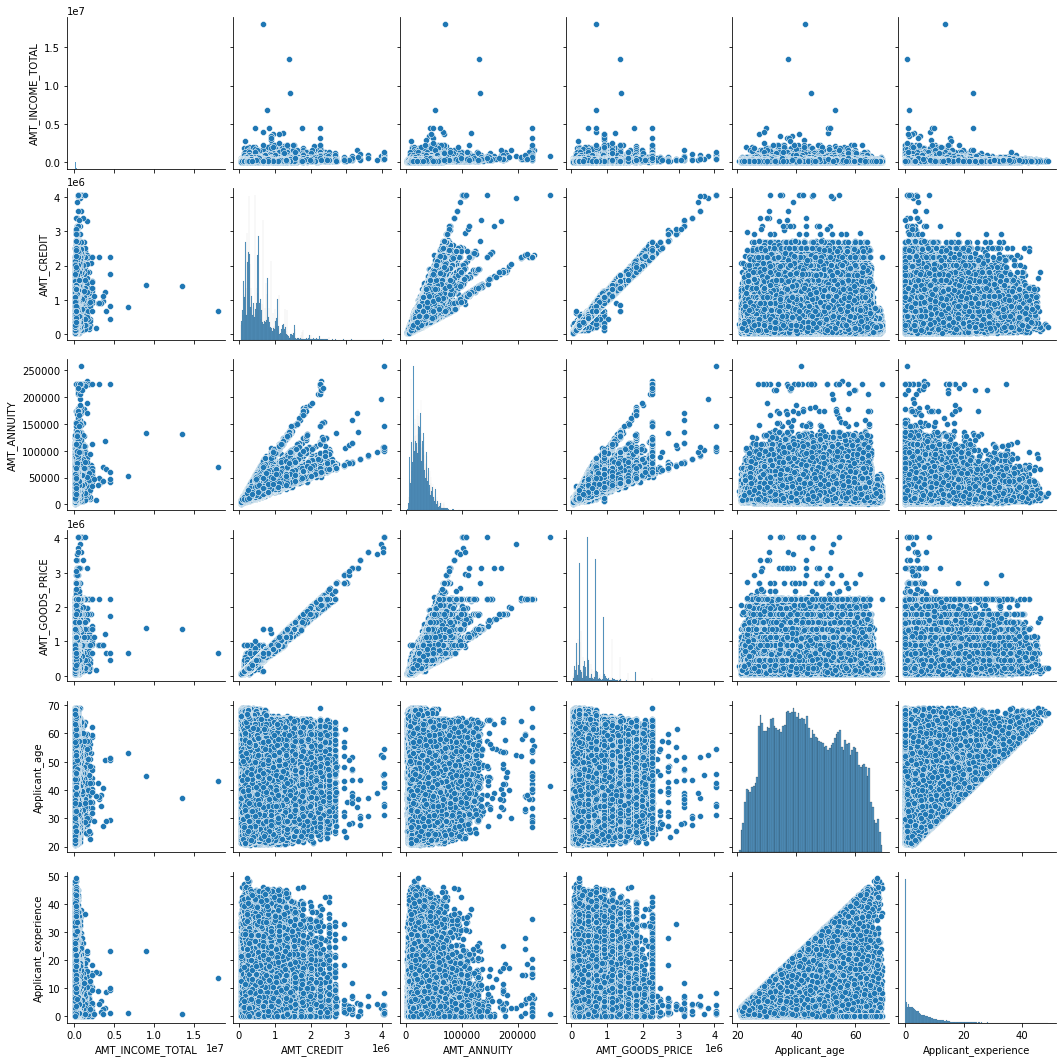

In [84]:
sns.pairplot(data=inp0, vars=("AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Applicant_age","Applicant_experience"))
plt.show()

## Segmented Bivariate

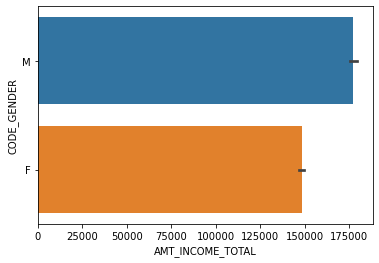

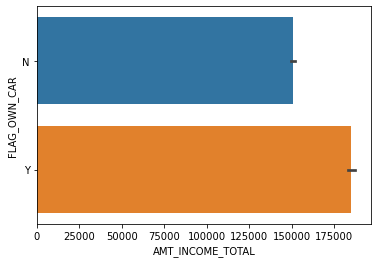

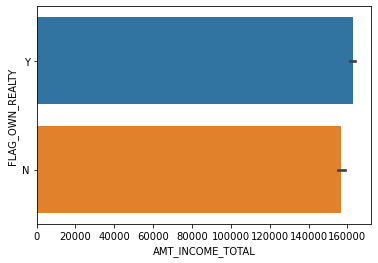

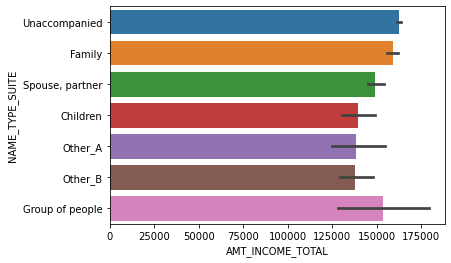

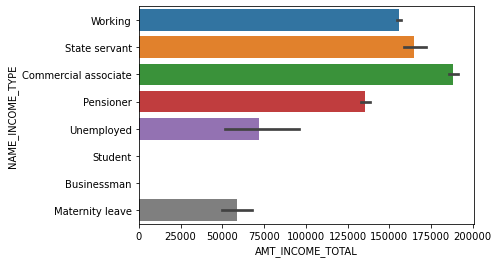

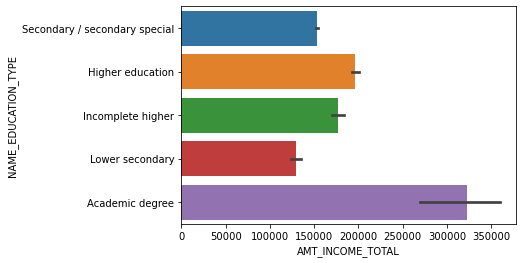

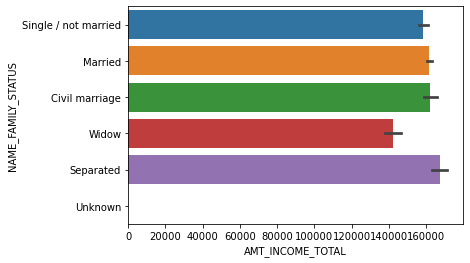

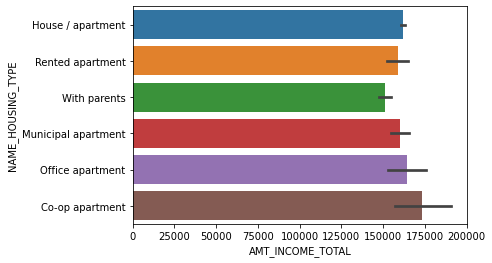

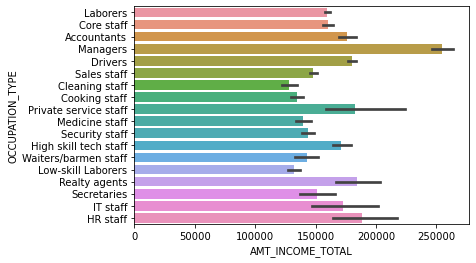

In [85]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar1.AMT_INCOME_TOTAL, inp0[i])
    plt.show()

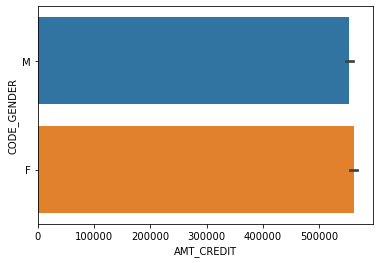

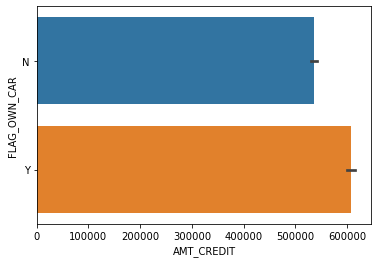

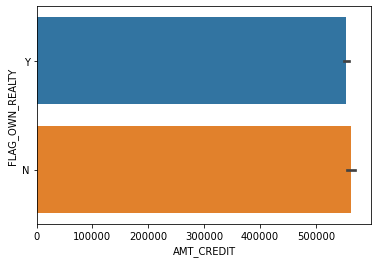

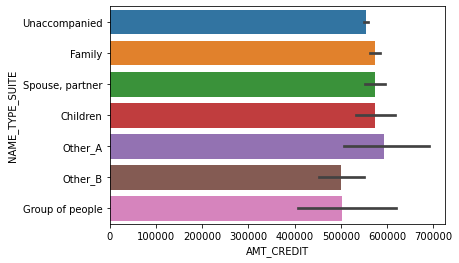

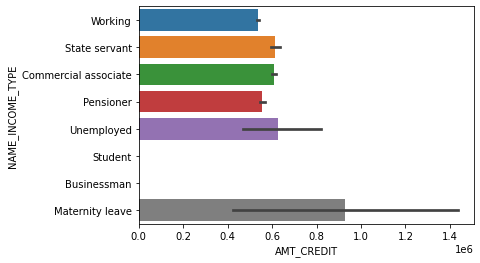

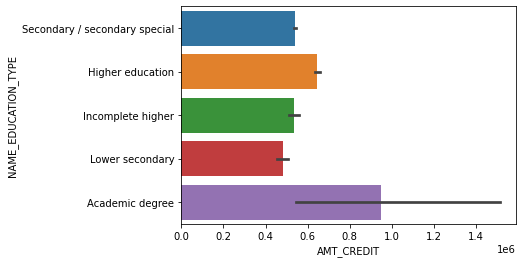

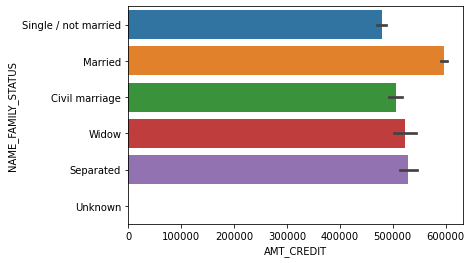

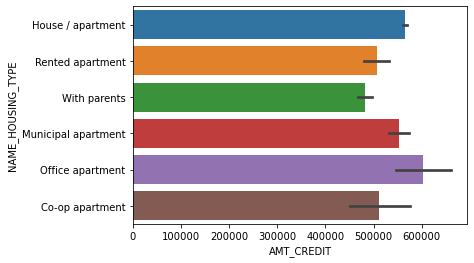

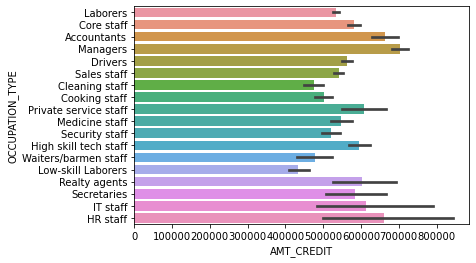

In [86]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar1.AMT_CREDIT, inp0[i])
    plt.show()

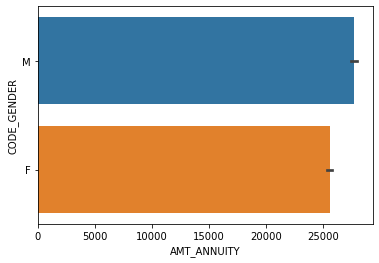

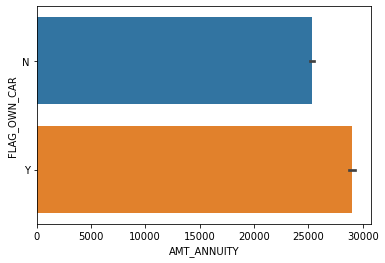

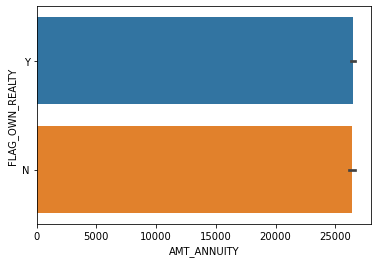

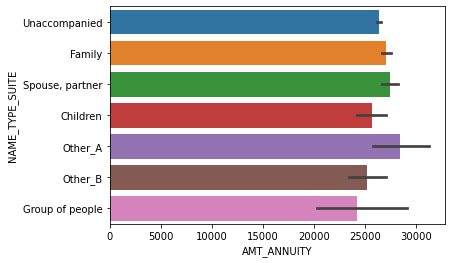

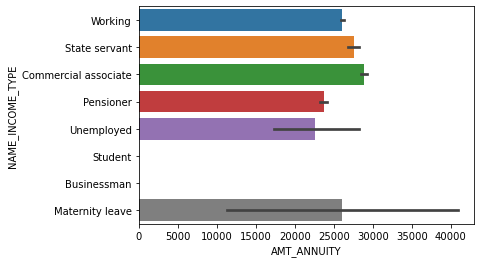

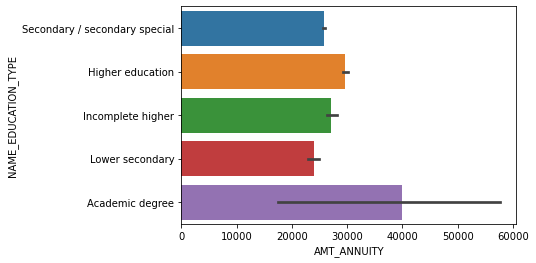

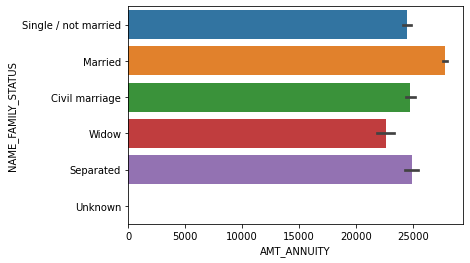

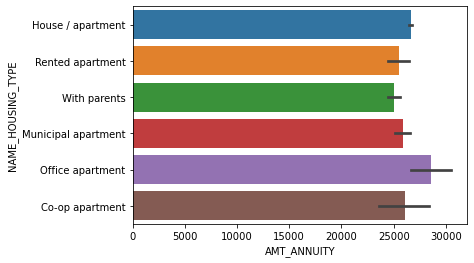

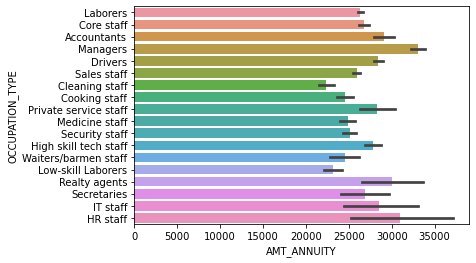

In [87]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar1.AMT_ANNUITY, inp0[i])
    plt.show()

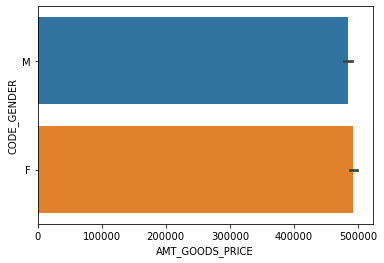

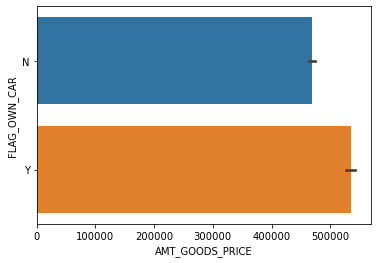

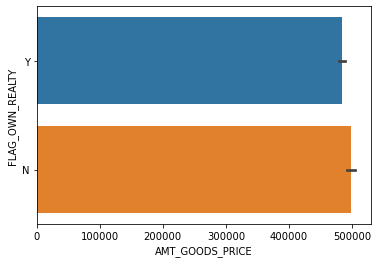

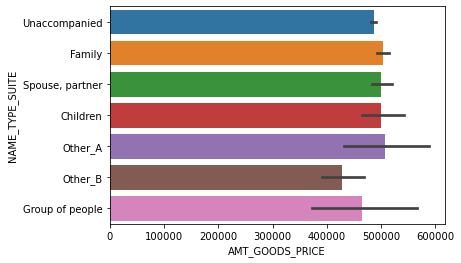

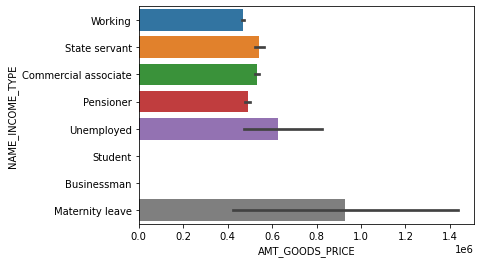

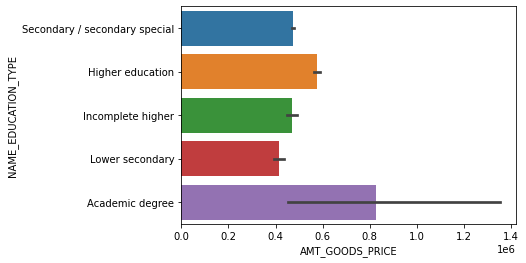

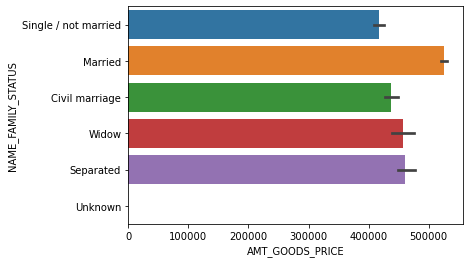

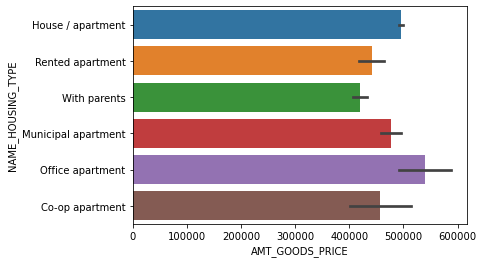

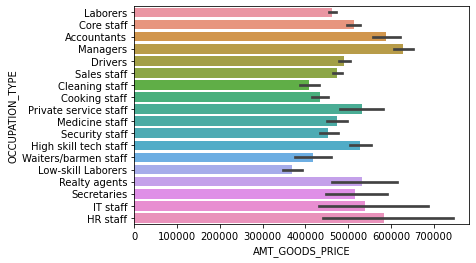

In [88]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar1.AMT_GOODS_PRICE, inp0[i])
    plt.show()

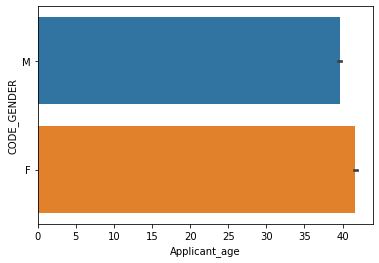

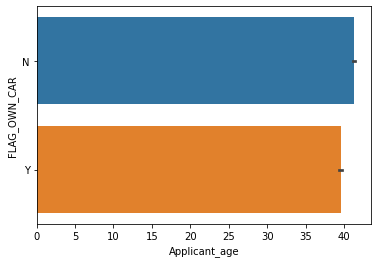

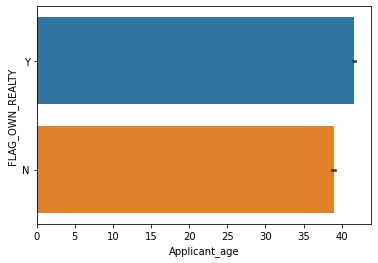

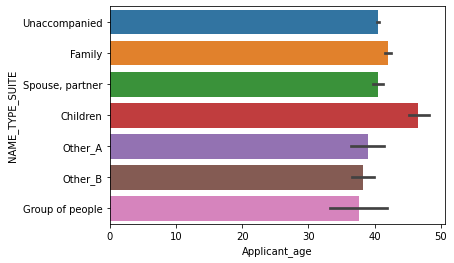

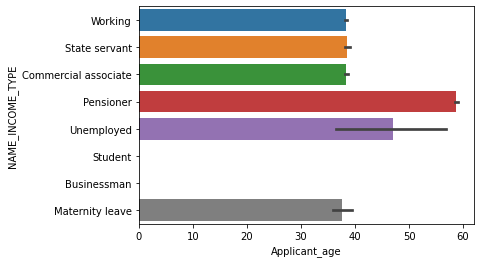

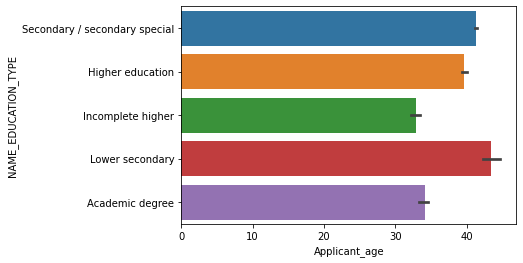

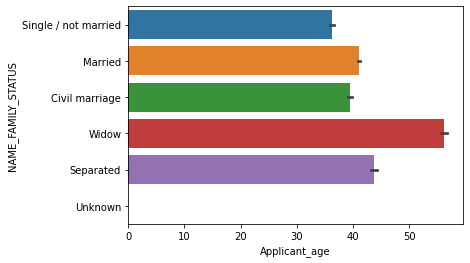

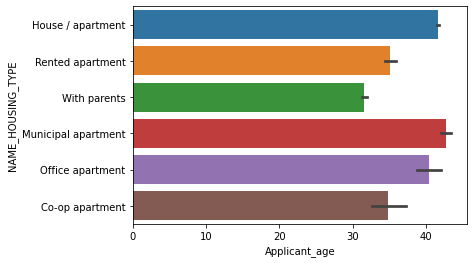

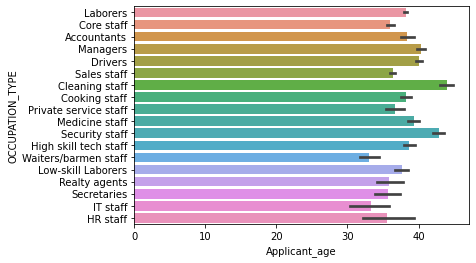

In [89]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar1.Applicant_age, inp0[i])
    plt.show()

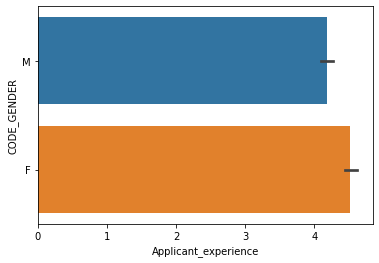

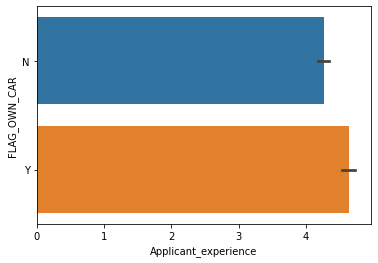

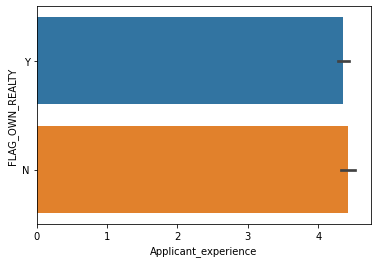

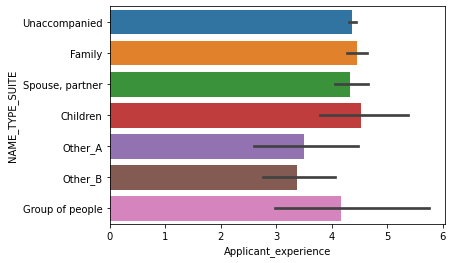

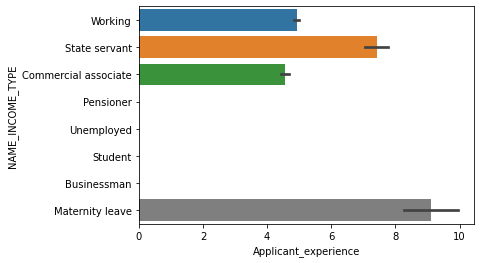

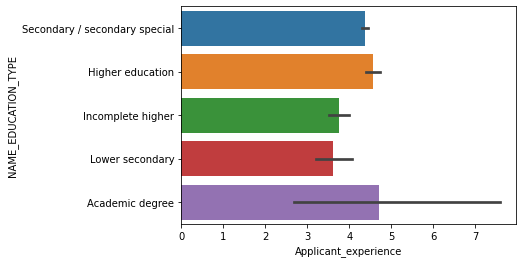

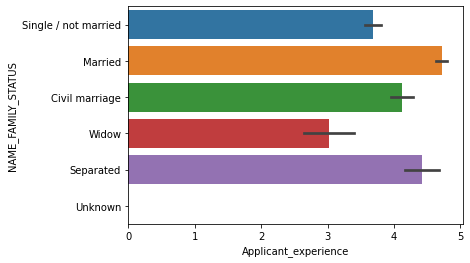

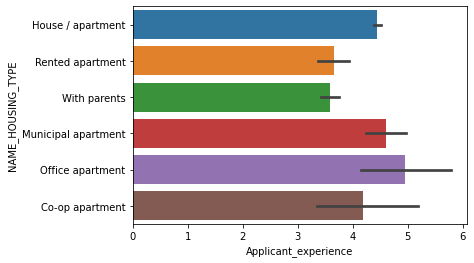

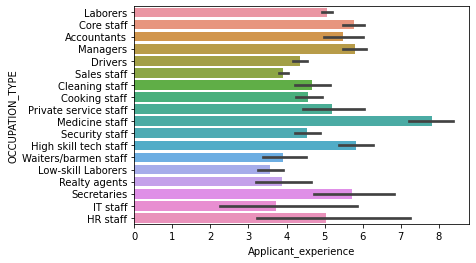

In [90]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar1.Applicant_experience, inp0[i])
    plt.show()

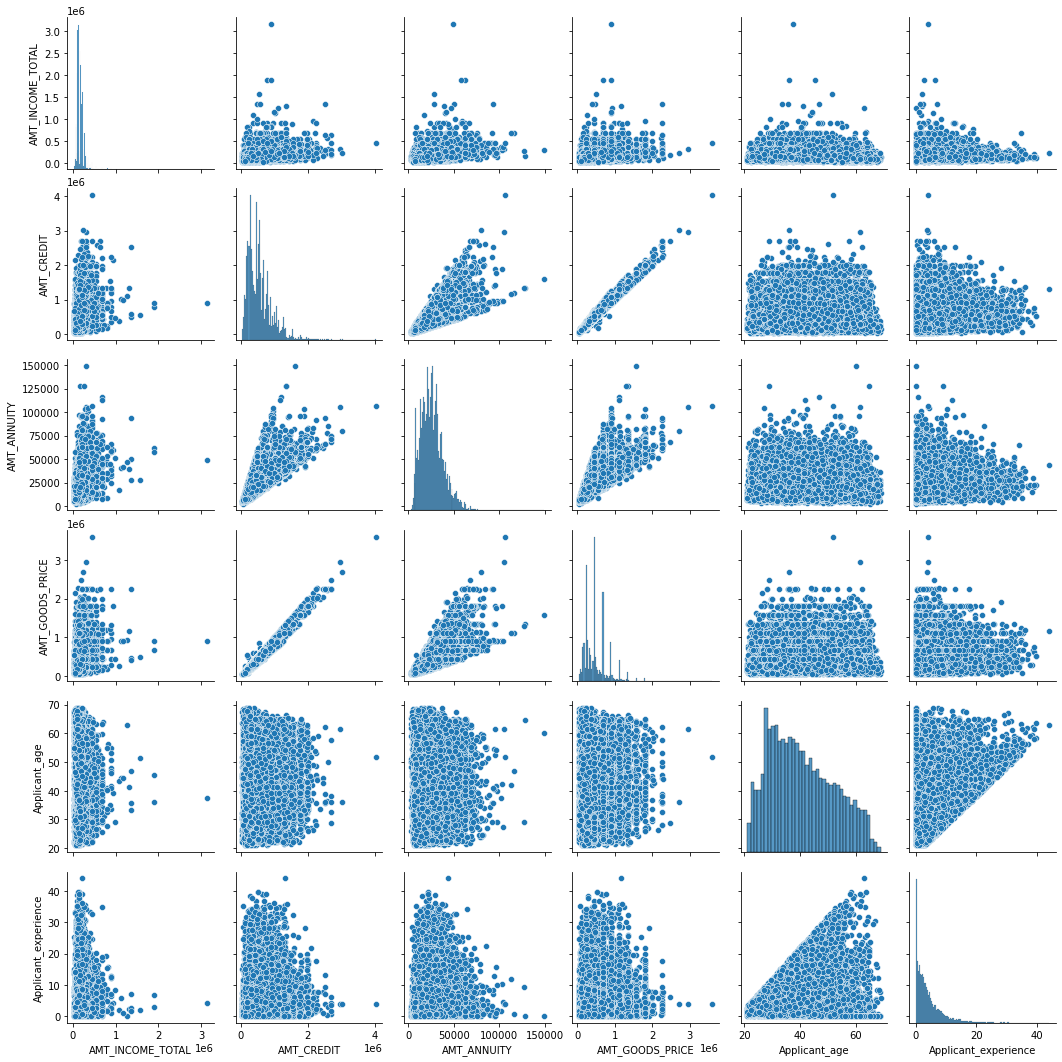

In [91]:
sns.pairplot(data=inp_Tar1, vars=("AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Applicant_age","Applicant_experience"))
plt.show()

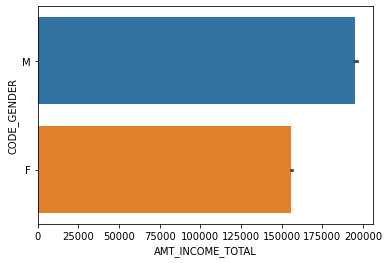

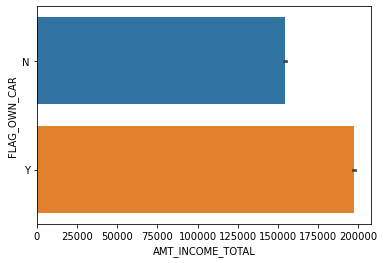

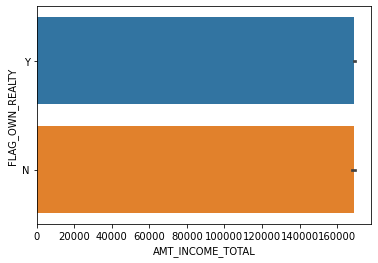

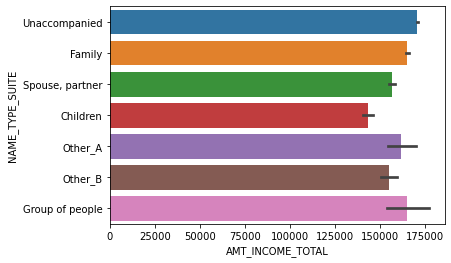

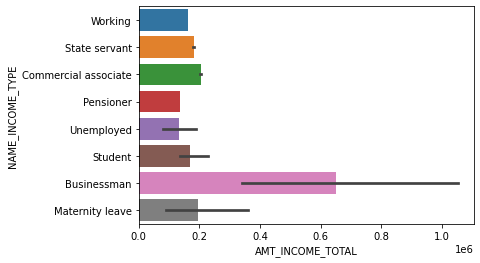

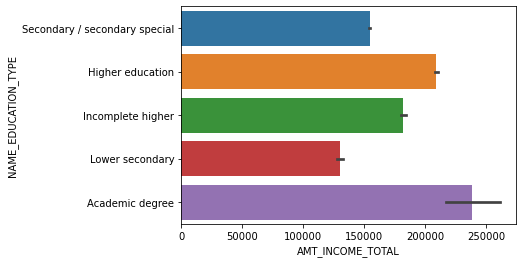

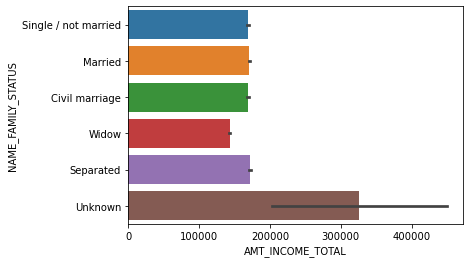

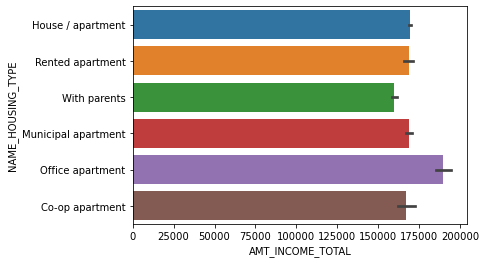

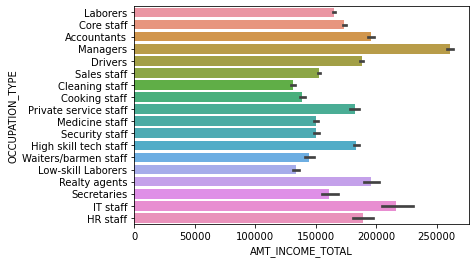

In [92]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar0.AMT_INCOME_TOTAL, inp0[i])
    plt.show()

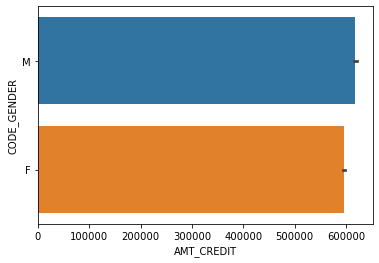

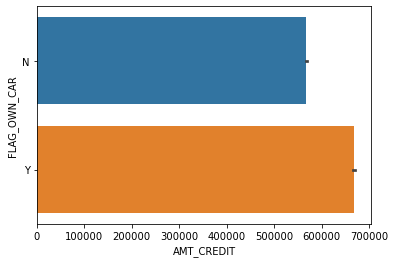

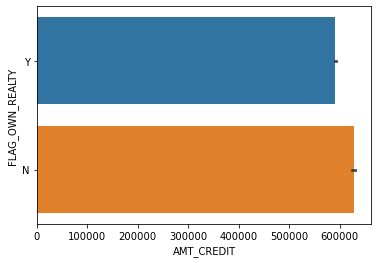

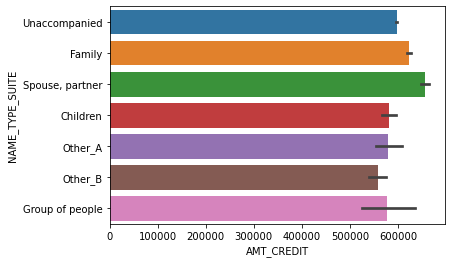

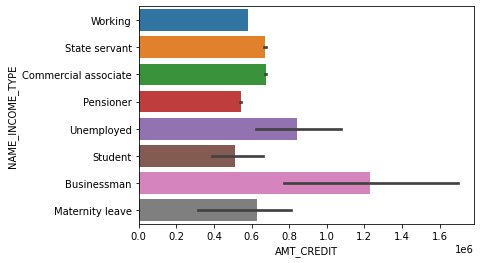

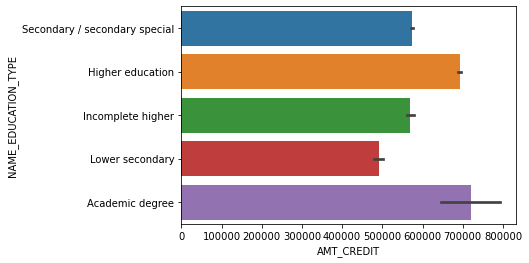

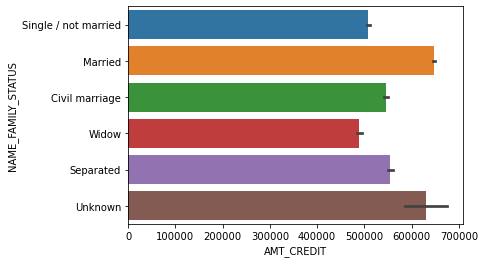

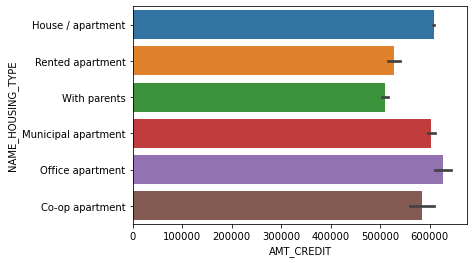

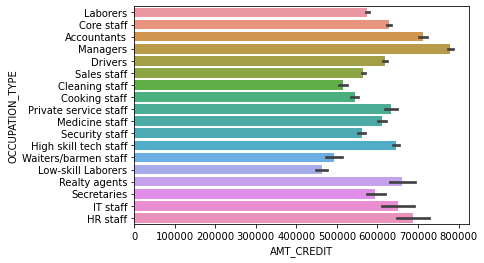

In [93]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar0.AMT_CREDIT, inp0[i])
    plt.show()

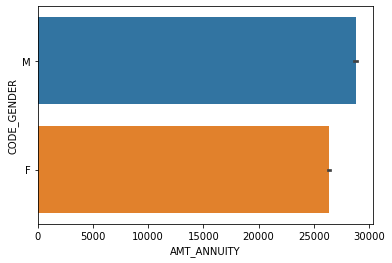

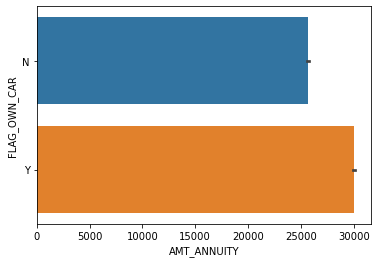

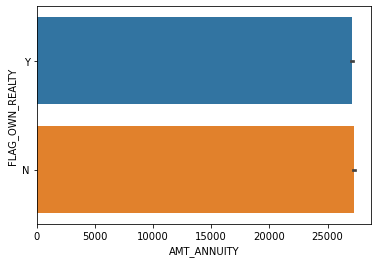

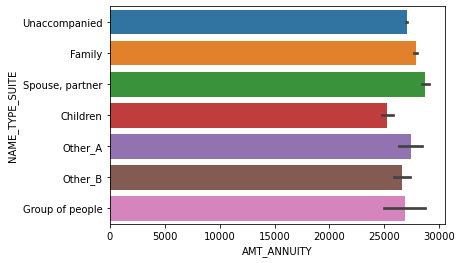

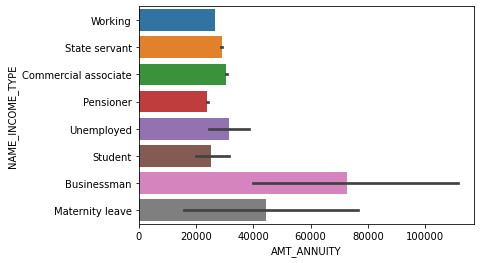

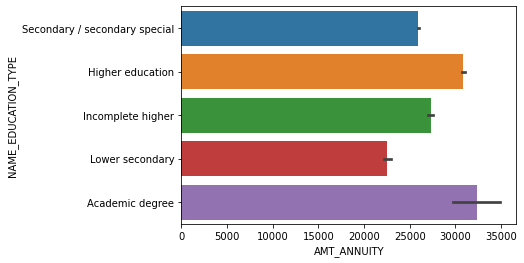

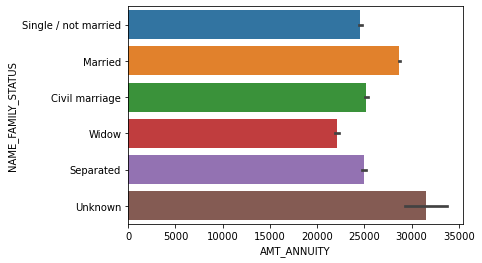

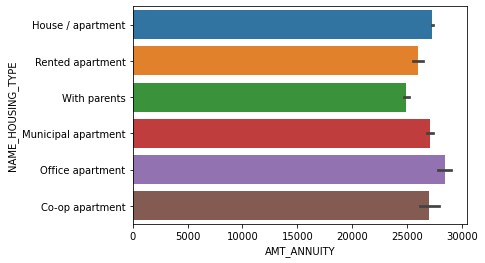

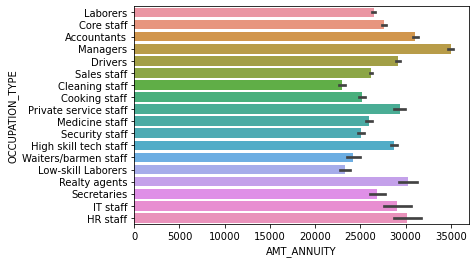

In [94]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar0.AMT_ANNUITY, inp0[i])
    plt.show()

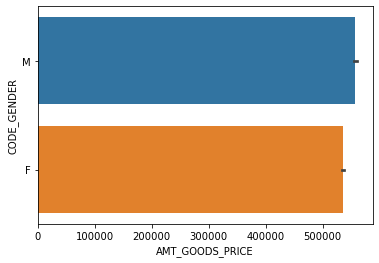

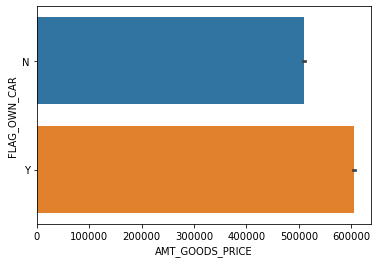

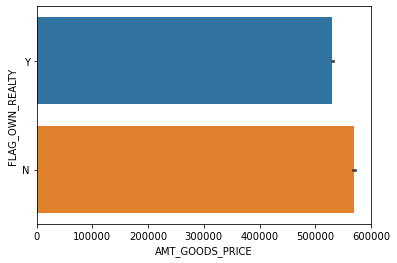

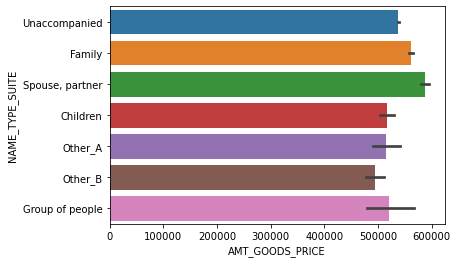

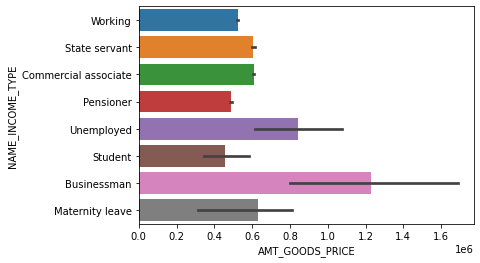

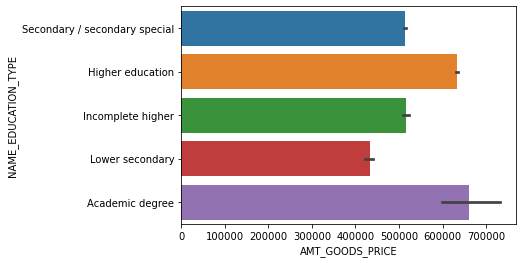

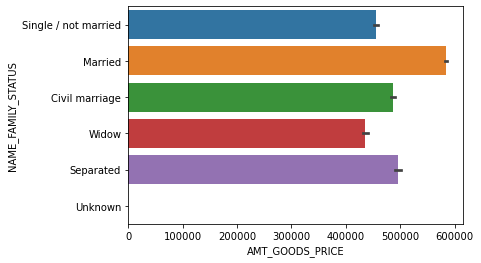

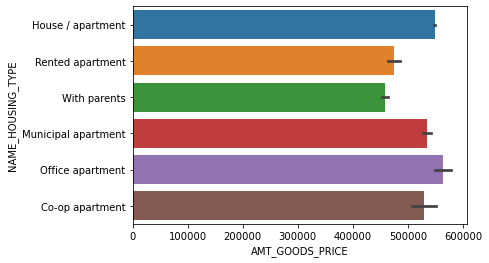

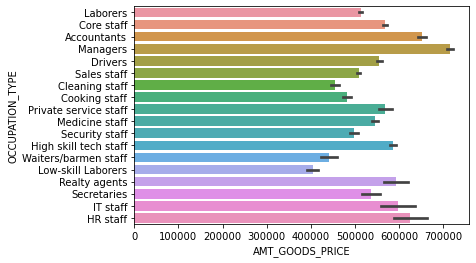

In [95]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar0.AMT_GOODS_PRICE, inp0[i])
    plt.show()

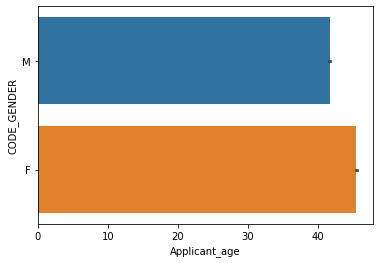

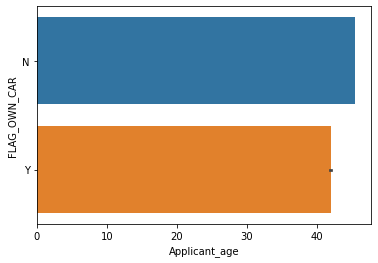

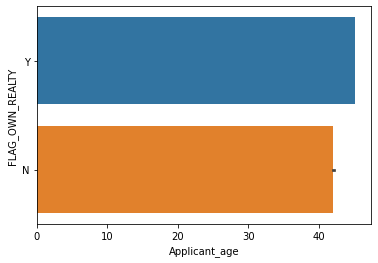

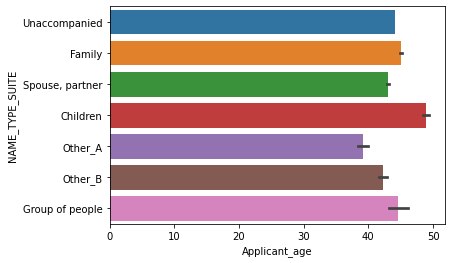

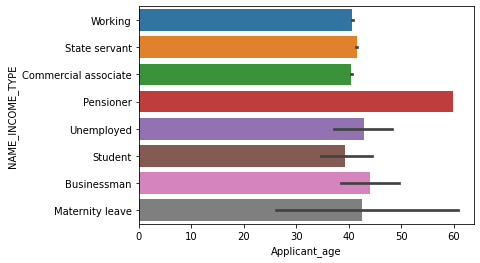

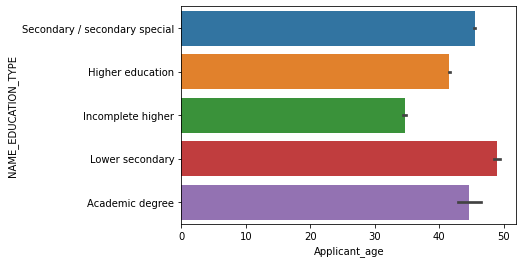

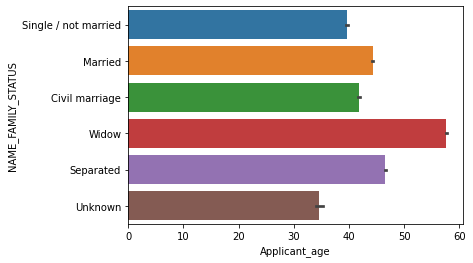

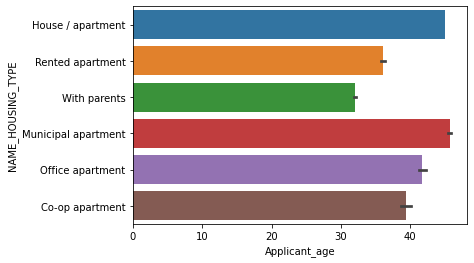

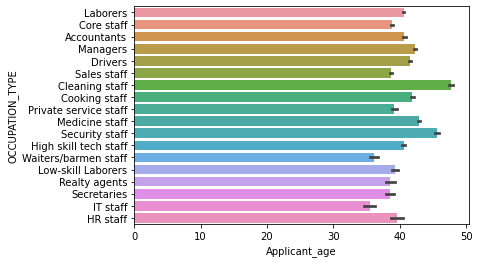

In [96]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar0.Applicant_age, inp0[i])
    plt.show()

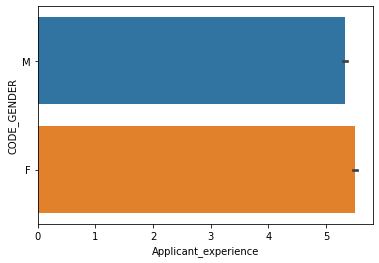

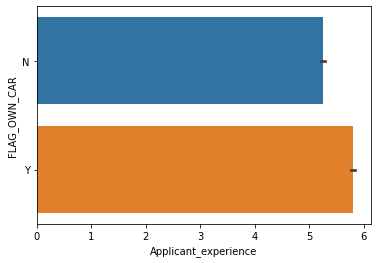

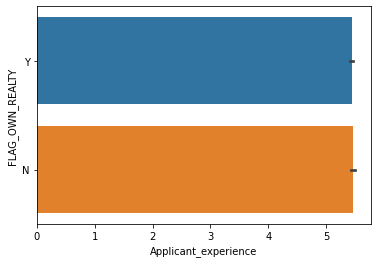

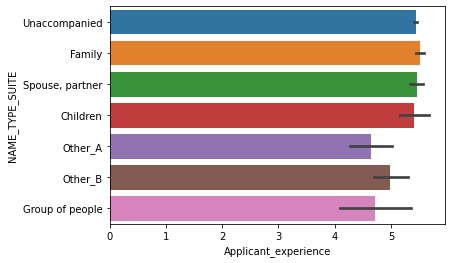

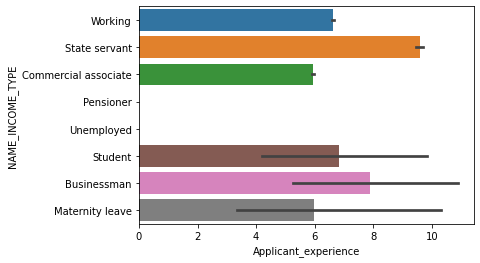

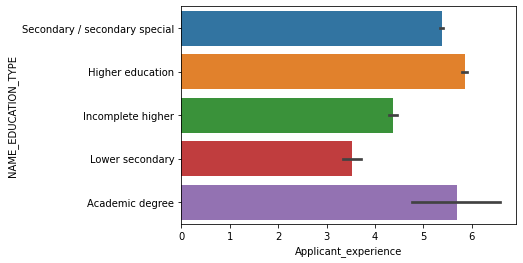

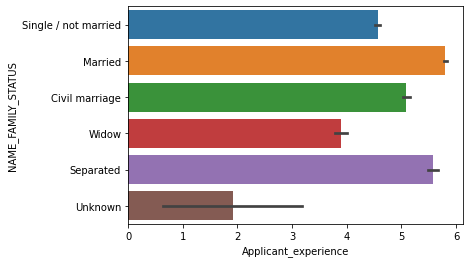

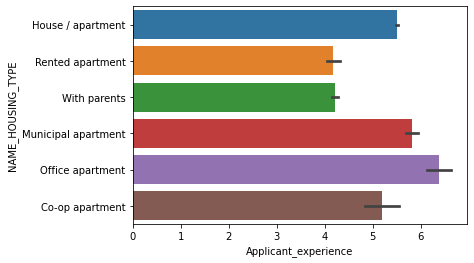

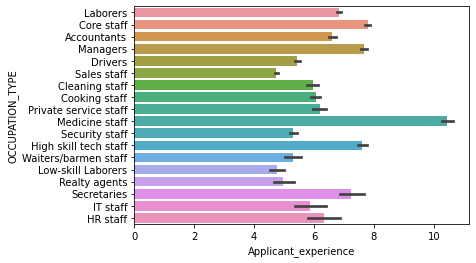

In [97]:
List1=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

for i in List1:
    sns.barplot(inp_Tar0.Applicant_experience, inp0[i])
    plt.show()

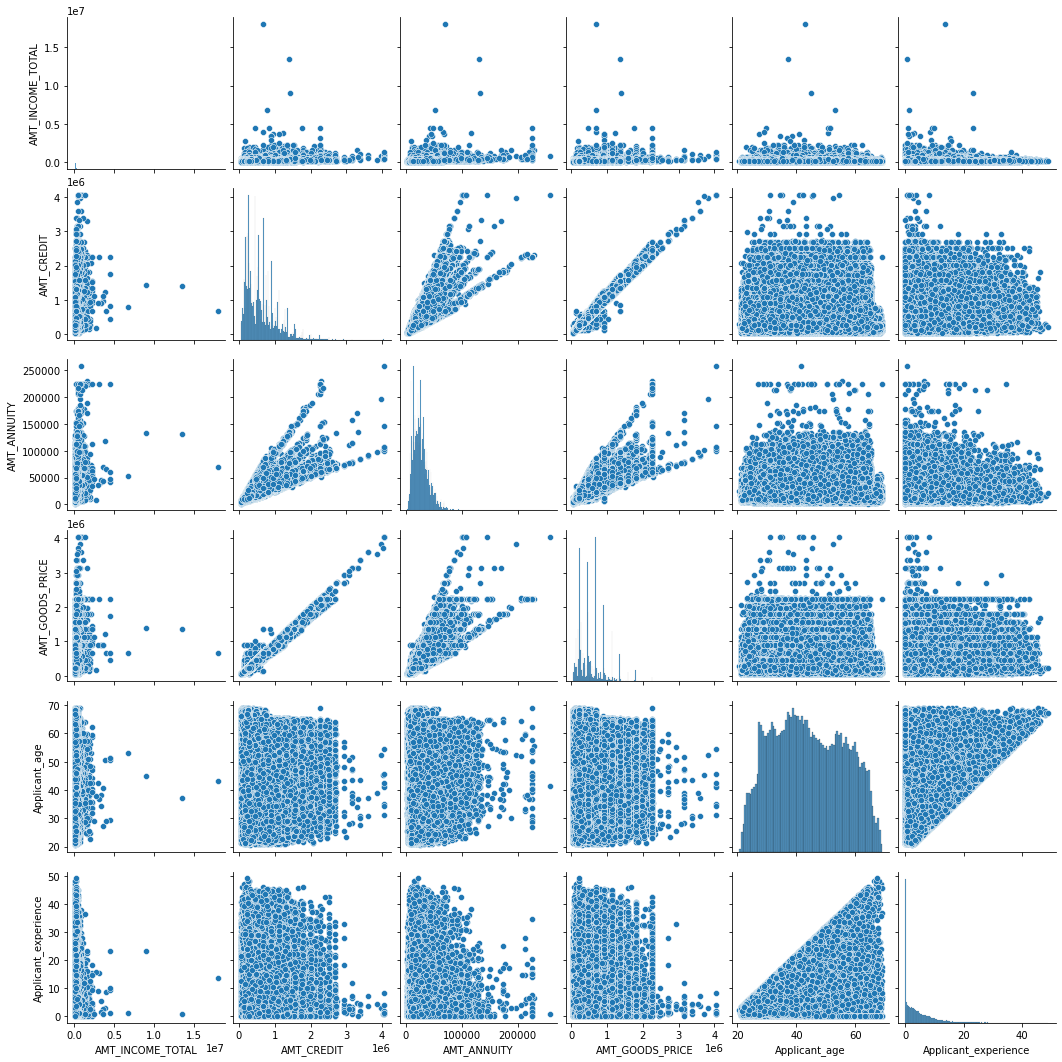

In [98]:
sns.pairplot(data=inp_Tar0, vars=("AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Applicant_age","Applicant_experience"))
plt.show()

#### As per above all univariate, segmented univariate, bivariate and segmented bivariate analysis no exceptions observed for variables all these variables "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Applicant_age","Applicant_experience" +vely corelated to each other and other variable shows normal behaviour except for Income _Type "Maternity leaves"  for Target variable 1

#### Target variable "1" applicants on maternity leave have less income, higher credit amount, higer annuity and higher goods price, less age, but higher experience. which might be risky beacuse with less income how can she will be able to pay high annuity amount.

#### Let's check in previous data that these applicants applied for loan or not and that loan has been approved or not, if not approved what would be the reason for that.

## Previous Application Data

In [99]:
inp1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [130]:
C_data = pd.merge(inp0, inp1, how='inner', on = 'SK_ID_CURR')
C_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2              291          NaN           1               1                0   
3              291          NaN           1               1                0   
4             2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1 

In [131]:
C_data.iloc[307478:,:]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
307478       177814       0           Cash loans           F            N   
307479       177816       0           Cash loans           F            N   
307480       177817       0           Cash loans           F            N   
307481       177817       0           Cash loans           F            N   
307482       177817       0           Cash loans           F            N   
...             ...     ...                  ...         ...          ...   
1413552      456255       0           Cash loans           F            N   
1413553      456255       0           Cash loans           F            N   
1413554      456255       0           Cash loans           F            N   
1413555      456255       0           Cash loans           F            N   
1413556      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
307478                Y             0          112500.0      755190.0   
307479                Y             0          157500.0      900000.0   
307480                N             1          180000.0      545040.0   
307481                N             1          180000.0      545040.0   
307482                N             1          180000.0      545040.0   
...                 ...           ...               ...           ...   
1413552               N             0          157500.0      675000.0   
1413553               N             0          157500.0      675000.0   
1413554               N             0          157500.0      675000.0   
1413555               N             0          157500.0      675000.0   
1413556               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
307478         29947.5           675000.0     Unaccompanied   
307479         45954.0           900000.0            Family   
307480         20677.5           450000.0            Family   
307481         20677.5           450000.0            Family   
307482         20677.5           450000.0            Family   
...                ...                ...               ...   
1413552        49117.5           675000.0     Unaccompanied   
1413553        49117.5           675000.0     Unaccompanied   
1413554        49117.5           675000.0     Unaccompanied   
1413555        49117.5           675000.0     Unaccompanied   
1413556        49117.5           675000.0     Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
307478              Pensioner  Secondary / secondary special   
307479   Commercial associate  Secondary / secondary special   
307480   Commercial associate  Secondary / secondary special   
307481   Commercial associate  Secondary / secondary special   
307482   Commercial associate  Secondary / secondary special   
...                       ...                            ...   
1413552  Commercial associate               Higher education   
1413553  Commercial associate               Higher education   
1413554  Commercial associate               Higher education   
1413555  Commercial associate               Higher education   
1413556  Commercial associate               Higher education   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
307478               Widow  House / apartment                    0.024610   
307479             Married  House / apartment                    0.026392   
307480             Married       With parents                    0.010556   
307481             Married       With parents                    0.010556   
307482             Married       With parents                    0.010556   
...                    ...                ...                         ...   
1413552            Married  House / apartment                    0.046220   
1413553            Married  House / apartment                    

In [132]:
C_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413557 entries, 0 to 1413556
Data columns (total 93 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413557 non-null  int64  
 1   TARGET                        1413557 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413557 non-null  object 
 3   CODE_GENDER                   1413502 non-null  object 
 4   FLAG_OWN_CAR                  1413557 non-null  object 
 5   FLAG_OWN_REALTY               1413557 non-null  object 
 6   CNT_CHILDREN                  1413557 non-null  int64  
 7   AMT_INCOME_TOTAL              1413557 non-null  float64
 8   AMT_CREDIT_x                  1413557 non-null  float64
 9   AMT_ANNUITY_x                 1413464 non-null  float64
 10  AMT_GOODS_PRICE_x             1412349 non-null  float64
 11  NAME_TYPE_SUITE_x             1410031 non-null  object 
 12  NAME_INCOME_TYPE            

In [133]:
C_data.duplicated().sum()

0

In [134]:
C_data.drop(C_data.loc[:,'RATE_INTEREST_PRIMARY':'RATE_INTEREST_PRIVILEGED'].columns, axis = 1, inplace = True)

In [135]:
C_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413557 entries, 0 to 1413556
Data columns (total 91 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413557 non-null  int64  
 1   TARGET                        1413557 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413557 non-null  object 
 3   CODE_GENDER                   1413502 non-null  object 
 4   FLAG_OWN_CAR                  1413557 non-null  object 
 5   FLAG_OWN_REALTY               1413557 non-null  object 
 6   CNT_CHILDREN                  1413557 non-null  int64  
 7   AMT_INCOME_TOTAL              1413557 non-null  float64
 8   AMT_CREDIT_x                  1413557 non-null  float64
 9   AMT_ANNUITY_x                 1413464 non-null  float64
 10  AMT_GOODS_PRICE_x             1412349 non-null  float64
 11  NAME_TYPE_SUITE_x             1410031 non-null  object 
 12  NAME_INCOME_TYPE            

In [137]:
C_data.loc[(C_data["TARGET"]==1) & (C_data["NAME_INCOME_TYPE"]=='Maternity leave')]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
1001633      352877       1           Cash loans           F            N   
1001634      352877       1           Cash loans           F            N   
1001635      352877       1           Cash loans           F            N   
1001636      352877       1           Cash loans           F            N   
1001637      352877       1           Cash loans           F            N   
1001638      352877       1           Cash loans           F            N   
1001639      352877       1           Cash loans           F            N   
1001640      352877       1           Cash loans           F            N   
1001641      352877       1           Cash loans           F            N   
1001642      352877       1           Cash loans           F            N   
1001643      352877       1           Cash loans           F            N   
1001644      352877       1           Cash loans           F            N   
1339267      437628       1           Cash loans           F            Y   
1339268      437628       1           Cash loans           F            Y   
1339269      437628       1           Cash loans           F            Y   
1339270      437628       1           Cash loans           F            Y   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
1001633               Y             2           67500.0     1435500.0   
1001634               Y             2           67500.0     1435500.0   
1001635               Y             2           67500.0     1435500.0   
1001636               Y             2           67500.0     1435500.0   
1001637               Y             2           67500.0     1435500.0   
1001638               Y             2           67500.0     1435500.0   
1001639               Y             2           67500.0     1435500.0   
1001640               Y             2           67500.0     1435500.0   
1001641               Y             2           67500.0     1435500.0   
1001642               Y             2           67500.0     1435500.0   
1001643               Y             2           67500.0     1435500.0   
1001644               Y             2           67500.0     1435500.0   
1339267               Y             2           49500.0      423000.0   
1339268               Y             2           49500.0      423000.0   
1339269               Y             2           49500.0      423000.0   
1339270               Y             2           49500.0      423000.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
1001633        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001634        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001635        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001636        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001637        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001638        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001639        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001640        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001641        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001642        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001643        40896.0          1435500.0     Unaccompanied  Maternity leave   
1001644        40896.0          1435500.0     Unaccompanied  Maternity leave   
1339267        11286.0           423000.0   Spouse, partner  Maternity leave   
1339268        11286.0           423000.0   Spouse, partner  Maternity leave   
1339269        11286.0           423000.0   Spouse, partner  Maternity leave   
1339270        11286.0           423000.0   Spouse, partner  Maternity leave   

                   NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1001633  Seconda

#### no need to remove applicants with income_type "Maternity leave" as their previous records said they can pay installments, so they are eligible to take loan.

In [139]:
C_data.NAME_CONTRACT_STATUS.value_counts()

Approved        886001
Canceled        259419
Refused         245368
Unused offer     22769
Name: NAME_CONTRACT_STATUS, dtype: int64

In [140]:
C_data.CODE_REJECT_REASON.value_counts()

XAP       1145413
HC         145975
LIMIT       47763
SCO         32634
CLIENT      22769
SCOFR       10874
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64

#### Creating Pivot to find out count of various contract status for each applicant.

In [194]:
data1=pd.pivot_table(data=C_data, index=['SK_ID_CURR','TARGET'], columns=['NAME_CONTRACT_STATUS'], values=['CODE_REJECT_REASON'], aggfunc='count')
data1

CODE_REJECT_REASON                              
NAME_CONTRACT_STATUS           Approved Canceled Refused Unused offer
SK_ID_CURR TARGET                                                    
100002     1                        1.0      NaN     NaN          NaN
100003     0                        3.0      NaN     NaN          NaN
100004     0                        1.0      NaN     NaN          NaN
100006     0                        5.0      3.0     1.0          NaN
100007     0                        6.0      NaN     NaN          NaN
...                                 ...      ...     ...          ...
456251     0                        1.0      NaN     NaN          NaN
456252     0                        1.0      NaN     NaN          NaN
456253     0                        2.0      NaN     NaN          NaN
456254     1                        2.0      NaN     NaN          NaN
456255     0                        6.0      NaN     2.0          NaN

[291023 rows x 4 columns]

In [195]:
#converting pivot to normal data frame
data1.columns = data1.columns.droplevel(0)
data1 = data1.reset_index().rename_axis(None, axis=1)

In [196]:
data1

SK_ID_CURR  TARGET  Approved  Canceled  Refused  Unused offer
0           100002       1       1.0       NaN      NaN           NaN
1           100003       0       3.0       NaN      NaN           NaN
2           100004       0       1.0       NaN      NaN           NaN
3           100006       0       5.0       3.0      1.0           NaN
4           100007       0       6.0       NaN      NaN           NaN
...            ...     ...       ...       ...      ...           ...
291018      456251       0       1.0       NaN      NaN           NaN
291019      456252       0       1.0       NaN      NaN           NaN
291020      456253       0       2.0       NaN      NaN           NaN
291021      456254       1       2.0       NaN      NaN           NaN
291022      456255       0       6.0       NaN      2.0           NaN

[291023 rows x 6 columns]

#####  Filtering out the applicants which are default cases and have higher count of rejected application than approved application.

In [199]:
Rejected_Cases=data1[data1['Approved']<data1['Refused']]
Defaulters_data=Rejected_Cases[Rejected_Cases['TARGET']==1]
Defaulters_data

SK_ID_CURR  TARGET  Approved  Canceled  Refused  Unused offer
246         100301       1       2.0       NaN      5.0           NaN
395         100485       1       2.0       3.0      3.0           NaN
450         100547       1       7.0       NaN      8.0           NaN
592         100717       1       2.0       NaN      4.0           NaN
668         100816       1       4.0       7.0      9.0           NaN
...            ...     ...       ...       ...      ...           ...
290772      455973       1       3.0       NaN      5.0           NaN
290826      456034       1       1.0       NaN      2.0           NaN
290902      456112       1       3.0       6.0      8.0           NaN
290947      456171       1       2.0       7.0      3.0           NaN
290994      456225       1       2.0       NaN      3.0           NaN

[2811 rows x 6 columns]

#### Merge the data to applicant data

In [200]:
data2=pd.merge(inp0, data1, how='left', on = 'SK_ID_CURR')
data2.head()

SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002         1         Cash loans           M            N   
1      100003         0         Cash loans           F            N   
2      100004         0    Revolving loans           M            Y   
3      100006         0         Cash loans           F            N   
4      100007         0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

In [201]:
data2.shape

(307477, 62)

In [204]:
# Merging defaulters data so that we can filter out applicant data to which bank can provide loan.

df=pd.merge(data2, Defaulters_data, how='left', on = 'SK_ID_CURR')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307477 entries, 0 to 307476
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307477 non-null  int64  
 1   TARGET_x                     307477 non-null  int64  
 2   NAME_CONTRACT_TYPE           307477 non-null  object 
 3   CODE_GENDER                  307473 non-null  object 
 4   FLAG_OWN_CAR                 307477 non-null  object 
 5   FLAG_OWN_REALTY              307477 non-null  object 
 6   CNT_CHILDREN                 307477 non-null  int64  
 7   AMT_INCOME_TOTAL             307477 non-null  float64
 8   AMT_CREDIT                   307477 non-null  float64
 9   AMT_ANNUITY                  307465 non-null  float64
 10  AMT_GOODS_PRICE              307199 non-null  float64
 11  NAME_TYPE_SUITE              306185 non-null  object 
 12  NAME_INCOME_TYPE             307477 non-null  object 
 13 

In [206]:
df1=df[df['Refused_y'].isnull()]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304666 entries, 0 to 307476
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304666 non-null  int64  
 1   TARGET_x                     304666 non-null  int64  
 2   NAME_CONTRACT_TYPE           304666 non-null  object 
 3   CODE_GENDER                  304662 non-null  object 
 4   FLAG_OWN_CAR                 304666 non-null  object 
 5   FLAG_OWN_REALTY              304666 non-null  object 
 6   CNT_CHILDREN                 304666 non-null  int64  
 7   AMT_INCOME_TOTAL             304666 non-null  float64
 8   AMT_CREDIT                   304666 non-null  float64
 9   AMT_ANNUITY                  304654 non-null  float64
 10  AMT_GOODS_PRICE              304393 non-null  float64
 11  NAME_TYPE_SUITE              303383 non-null  object 
 12  NAME_INCOME_TYPE             304666 non-null  object 
 13 

In [208]:
df1.drop(df1.loc[:,'TARGET':'Unused offer_y'].columns, axis = 1, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304666 entries, 0 to 307476
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304666 non-null  int64  
 1   TARGET_x                     304666 non-null  int64  
 2   NAME_CONTRACT_TYPE           304666 non-null  object 
 3   CODE_GENDER                  304662 non-null  object 
 4   FLAG_OWN_CAR                 304666 non-null  object 
 5   FLAG_OWN_REALTY              304666 non-null  object 
 6   CNT_CHILDREN                 304666 non-null  int64  
 7   AMT_INCOME_TOTAL             304666 non-null  float64
 8   AMT_CREDIT                   304666 non-null  float64
 9   AMT_ANNUITY                  304654 non-null  float64
 10  AMT_GOODS_PRICE              304393 non-null  float64
 11  NAME_TYPE_SUITE              303383 non-null  object 
 12  NAME_INCOME_TYPE             304666 non-null  object 
 13 

### Final output or the applicants to those bank can provide loan

In [209]:
df1

SK_ID_CURR  TARGET_x NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         1         Cash loans           M            N   
1           100003         0         Cash loans           F            N   
2           100004         0    Revolving loans           M            Y   
3           100006         0         Cash loans           F            N   
4           100007         0         Cash loans           M            N   
...            ...       ...                ...         ...          ...   
307472      456251         0         Cash loans           M            N   
307473      456252         0         Cash loans           F            N   
307474      456253         0         Cash loans           F            N   
307475      456254         1         Cash loans           F            N   
307476      456255         0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307472               N             0          157500.0    254700.0   
307473               Y             0           72000.0    269550.0   
307474               Y             0          153000.0    677664.0   
307475               Y             0          171000.0    370107.0   
307476               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307472      27558.0         225000.0   Unaccompanied               Working   
307473      12001.5         225000.0   Unaccompanied             Pensioner   
307474      29979.0         585000.0   Unaccompanied               Working   
307475      20205.0         319500.0   Unaccompanied  Commercial associate   
307476      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307472  Secondary / secondary special             Separated   
307473  Secondary / secondary special                 Widow   
307474               Higher education             Separated   
307475  Secondary / secondary special               Married   
307476               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801        9461   
1       House / apartment                    0.003541       16765   
2       House / apartment                    0.010032       19046   
3       House / apartment                    0.008019       19005   
4       House / apartment                    0.028663       19932   
...                   ...                         ...         ...   
307472       With parents                    0.032561        9327   
307473  